### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# State Level Data

## Pre-Existing Health Conditions Datasets:

#### For pre-existing conditions & immunizations:
1. choose crude or adj
2. drop old index
3. rename data value to question
4. drop year and question columns
5. For total number of incident data -> after concatening with population data, convert to rate

*Crude are the raw numbers. Adj are these numbers adjusted/ standardized based on population's age distribution. We can retain the crude numbers however the age adjusted numbers will probably be better for cross comparison*

In [2]:
asthma = pd.read_csv('../Data/Raw/asthma_adj.csv')
asthma.rename(columns={
    'DataValue':'asthma_prevalence',
    'LocationDesc':'Location'}, inplace=True)

In [111]:
asthma.drop(columns=['YearStart', 'Question'], inplace=True)
asthma.head()

,Location,asthma_prevalence
0,Alaska,9.7
1,Alabama,9.4
2,Arkansas,9.3
3,Arizona,9.8
4,California,7.8


In [112]:
high_bp = pd.read_csv('../Data/Raw/high_blood_pressure_adj.csv')
high_bp.head()

,YearStart,LocationDesc,Question,DataValue
0,2019,Alaska,Awareness of high blood pressure among adults ...,32.8
1,2019,Alabama,Awareness of high blood pressure among adults ...,39.4
2,2019,Arkansas,Awareness of high blood pressure among adults ...,38.2
3,2019,Arizona,Awareness of high blood pressure among adults ...,29.9
4,2019,California,Awareness of high blood pressure among adults ...,26.6


In [113]:
high_bp.rename(columns={
    'DataValue':'high_bp_prevalence',
    'LocationDesc':'Location'}, inplace=True)
high_bp.drop(columns=['YearStart', 'Question'], inplace=True)
high_bp.head()

,Location,high_bp_prevalence
0,Alaska,32.8
1,Alabama,39.4
2,Arkansas,38.2
3,Arizona,29.9
4,California,26.6


In [114]:
cardiac_mortality = pd.read_csv('../Data/Raw/cardiac_mortality_adj.csv')
cardiac_mortality.rename(columns={
    'DataValue':'cardiac_mortality_rate',
    'LocationDesc':'Location'}, inplace=True)
cardiac_mortality.drop(columns=['YearStart', 'Question'], inplace=True)
cardiac_mortality.head()

,Location,cardiac_mortality_rate
0,Delaware,214.3
1,Georgia,234.3
2,Alaska,178.5
3,Kentucky,253.8
4,Arkansas,284.3


In [115]:
diabetes = pd.read_csv('../Data/Raw/diabetes_adj.csv')
diabetes.head()
diabetes.rename(columns={
    'DataValue':'diabetes_prevalence',
    'LocationDesc':'Location'}, inplace=True)

In [116]:
diabetes.drop(columns=['YearStart', 'Question'], inplace=True)
diabetes.head()

,Location,diabetes_prevalence
0,Alaska,7.1
1,Alabama,12.2
2,Arkansas,12.2
3,Arizona,9.8
4,California,9.4


In [117]:
kidney = pd.read_csv('../Data/Raw/kidney_adj.csv')
kidney.head()

,YearStart,LocationDesc,Question,DataValue
0,2019,Alaska,Prevalence of chronic kidney disease among adu...,1.8
1,2019,Alabama,Prevalence of chronic kidney disease among adu...,3.1
2,2019,Arkansas,Prevalence of chronic kidney disease among adu...,3.7
3,2019,California,Prevalence of chronic kidney disease among adu...,2.8
4,2019,Arizona,Prevalence of chronic kidney disease among adu...,3.6


In [118]:
kidney.rename(columns={
    'DataValue':'kidney_disease_prevalence',
    'LocationDesc':'Location'}, inplace=True)

In [119]:
kidney.drop(columns=['YearStart', 'Question'], inplace=True)
kidney.head()

,Location,kidney_disease_prevalence
0,Alaska,1.8
1,Alabama,3.1
2,Arkansas,3.7
3,California,2.8
4,Arizona,3.6


In [120]:
copd = pd.read_csv('../Data/Raw/copd_adj.csv')
copd.rename(columns={
    'DataValue':'copd_prevalence',
    'LocationDesc':'Location'}, inplace=True)
copd.drop(columns=['YearStart', 'Question'], inplace=True)
copd.head()

,Location,copd_prevalence
0,Alaska,4.6
1,Alabama,9.3
2,Arkansas,9.7
3,California,4.2
4,Arizona,6.0


In [121]:
immun = pd.read_csv('../Data/Raw/immun_adj.csv')
immun.rename(columns={
    'DataValue':'flu_vaccination_rate_2019',
    'LocationDesc':'Location'}, inplace=True)
immun.drop(columns=['YearStart', 'Question'], inplace=True)
immun.head()

,Location,flu_vaccination_rate_2019
0,Alaska,37.0
1,Alabama,39.5
2,Arkansas,40.1
3,Arizona,37.1
4,California,40.7


In [122]:
pre_con = pd.merge(immun, asthma, on='Location', how='inner')

dataframes_to_merge = [cardiac_mortality, high_bp, copd, kidney, diabetes]

for df in dataframes_to_merge:
    pre_con = pd.merge(pre_con, df, on='Location', how='inner')

In [123]:
pre_con.head()

,Location,flu_vaccination_rate_2019,asthma_prevalence,cardiac_mortality_rate,high_bp_prevalence,copd_prevalence,kidney_disease_prevalence,diabetes_prevalence
0,Alaska,37.0,9.7,178.5,32.8,4.6,1.8,7.1
1,Alabama,39.5,9.4,289.3,39.4,9.3,3.1,12.2
2,Arkansas,40.1,9.3,284.3,38.2,9.7,3.7,12.2
3,Arizona,37.1,9.8,181.8,29.9,6.0,3.6,9.8
4,California,40.7,7.8,192.5,26.6,4.2,2.8,9.4


In [124]:
pre_con.to_csv('../Data/Cleaned/cleaned_pre_condtions.csv', index = True)

## Insurance rates by state

In [125]:
insur_2019 = pd.read_csv('../Data/Raw/2019_insurance.csv')
insur_2019.head()

,Location,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Year
0,United States,0.496,0.059,0.198,0.142,0.014,0.092,2019
1,Alabama,0.472,0.055,0.195,0.160,0.021,0.097,2019
2,Alaska,0.484,0.035,0.213,0.100,0.053,0.115,2019
3,Arizona,0.451,0.052,0.210,0.161,0.015,0.111,2019
4,Arkansas,0.420,0.054,0.262,0.159,0.014,0.091,2019


In [126]:
insur_2021 = pd.read_csv('../Data/Raw/2021_insurance.csv')

In [127]:
insur = pd.merge(insur_2019, insur_2021, how ='inner', on ='Location', suffixes=('_2019', '_2021'))
insur.head()

,Location,Employer_2019,Non-Group_2019,Medicaid_2019,Medicare_2019,Military_2019,Uninsured_2019,Year_2019,Employer_2021,Non-Group_2021,Medicaid_2021,Medicare_2021,Military_2021,Uninsured_2021,Year_2021
0,United States,0.496,0.059,0.198,0.142,0.014,0.092,2019,0.485,0.061,0.211,0.143,0.013,0.086,2021
1,Alabama,0.472,0.055,0.195,0.160,0.021,0.097,2019,0.466,0.060,0.192,0.162,0.021,0.100,2021
2,Alaska,0.484,0.035,0.213,0.100,0.053,0.115,2019,0.433,0.041,0.257,0.107,0.053,0.108,2021
3,Arizona,0.451,0.052,0.210,0.161,0.015,0.111,2019,0.450,0.054,0.213,0.162,0.015,0.106,2021
4,Arkansas,0.420,0.054,0.262,0.159,0.014,0.091,2019,0.411,0.056,0.270,0.156,0.015,0.092,2021


In [128]:
insur.drop(columns =['Year_2019', 'Year_2021'], inplace=True)

In [129]:
insur.to_csv('../Data/Cleaned/cleaned_insur.csv', index = False)

## Covid Vaccines by State

In [130]:
ea = pd.read_csv('../Data/Raw/Executive Approval.csv')

In [131]:
hb = pd.read_csv('../Data/Raw/Health Behavior.csv')

In [132]:
phb = pd.read_csv('../Data/Raw/Public Health Measures.csv')
phb.head()

,Wave_time,State,StateFIPS,Start_Date,End_Date,N_State,Requiring everyone to get a COVID-19 vaccine,Requiring a COVID-19 vaccine to get on an airplane,Requiring children to get a COVID-19 vaccine in order to be allowed in school,Requiring college students to get a COVID-19 vaccine in order to go back to university
0,December,United States,NaN,2020-12-16,2021-01-11,25640,55.5,63.0,56.0,NaN
1,December,Alaska,2.0,2020-12-16,2021-01-11,405,50.7,53.5,48.9,NaN
2,December,Alabama,1.0,2020-12-16,2021-01-11,448,48.4,60.0,51.0,NaN
3,December,Arkansas,5.0,2020-12-16,2021-01-11,469,39.0,46.1,40.6,NaN
4,December,Arizona,4.0,2020-12-16,2021-01-11,469,54.2,58.3,54.3,NaN


In [133]:
ea_2020 = ea[ea['Start_Date'] == '2020-04-16'].copy()
ea_2020.head()

,Wave_time,State,StateFIPS,Start_Date,End_Date,N_State,Current President,Your State Governor
0,Late Apr,United States,NaN,2020-04-16,2020-04-30,21405,43.098933,65.083608
1,Late Apr,Alaska,2.0,2020-04-16,2020-04-30,103,56.060775,64.208810
2,Late Apr,Alabama,1.0,2020-04-16,2020-04-30,465,54.371124,58.903232
3,Late Apr,Arkansas,5.0,2020-04-16,2020-04-30,460,53.716654,65.260685
4,Late Apr,Arizona,4.0,2020-04-16,2020-04-30,484,43.079904,57.217666


In [134]:
ea_2020.shape

(51, 8)

In [135]:
ea_2020.drop(columns=['Wave_time', 'StateFIPS', 'Start_Date', 'End_Date', 'N_State'], inplace=True)

In [136]:
hb_2020 = hb[hb['Start_Date'] == '2020-04-16'].copy()
hb_2020.drop(columns=['Wave_time', 'StateFIPS', 'Start_Date', 'End_Date', 'N_state'], inplace=True)
hb_2020.head()

,State,Go to work,Go to the gym,Go visit a friend,"Go to a cafe, bar, or restaurant",Go to a doctor or visit a hospital,Go to church or another place of worship,"Take mass transit (e.g. subway, bus or train)",Avoiding contact with other people,Avoiding public or crowded places,Frequently washing hands,Wearing a face mask when outside of your home,Been in a room with someone outside of \r\n household in the past 24 hours,"Yes, 5-10 people","Yes, 11-50 people","Yes, 50 or more people"
0,United States,25.71,1.36,8.31,5.78,5.54,1.29,1.82,68.77,75.23,80.36,55.96,26.27,5.17,1.42,0.83
1,Alaska,28.26,3.44,16.69,1.18,4.28,5.07,0.00,51.31,71.37,76.71,46.17,44.03,5.44,1.39,0.00
2,Alabama,26.31,2.61,11.48,8.44,6.96,3.23,0.42,67.99,76.28,80.84,51.94,30.52,6.70,1.22,1.00
3,Arkansas,29.37,0.72,11.52,5.41,5.81,2.08,0.11,58.48,68.32,80.59,44.19,30.78,7.73,1.49,1.00
4,Arizona,32.02,1.48,6.21,6.00,6.81,1.69,2.76,65.18,71.42,79.70,49.70,33.24,8.51,1.14,2.89


In [137]:
phb_2020 = phb[phb['Start_Date'] == '2020-12-16'].copy()
phb_2020.drop(columns=['Wave_time', 'StateFIPS', 'Start_Date', 'End_Date', 'N_State'], inplace=True)
phb_2020.head()

,State,Requiring everyone to get a COVID-19 vaccine,Requiring a COVID-19 vaccine to get on an airplane,Requiring children to get a COVID-19 vaccine in order to be allowed in school,Requiring college students to get a COVID-19 vaccine in order to go back to university
0,United States,55.5,63.0,56.0,NaN
1,Alaska,50.7,53.5,48.9,NaN
2,Alabama,48.4,60.0,51.0,NaN
3,Arkansas,39.0,46.1,40.6,NaN
4,Arizona,54.2,58.3,54.3,NaN


In [138]:
print(ea_2020.shape)
print(phb_2020.shape)
print(hb_2020.shape)

(51, 3)
(52, 5)
(52, 16)


In [139]:
health_behavior = pd.merge(ea_2020, hb_2020, how = 'left', on = 'State')

In [140]:
health_behavior.head()

,State,Current President,Your State Governor,Go to work,Go to the gym,Go visit a friend,"Go to a cafe, bar, or restaurant",Go to a doctor or visit a hospital,Go to church or another place of worship,"Take mass transit (e.g. subway, bus or train)",Avoiding contact with other people,Avoiding public or crowded places,Frequently washing hands,Wearing a face mask when outside of your home,Been in a room with someone outside of \r\n household in the past 24 hours,"Yes, 5-10 people","Yes, 11-50 people","Yes, 50 or more people"
0,United States,43.098933,65.083608,25.71,1.36,8.31,5.78,5.54,1.29,1.82,68.77,75.23,80.36,55.96,26.27,5.17,1.42,0.83
1,Alaska,56.060775,64.208810,28.26,3.44,16.69,1.18,4.28,5.07,0.00,51.31,71.37,76.71,46.17,44.03,5.44,1.39,0.00
2,Alabama,54.371124,58.903232,26.31,2.61,11.48,8.44,6.96,3.23,0.42,67.99,76.28,80.84,51.94,30.52,6.70,1.22,1.00
3,Arkansas,53.716654,65.260685,29.37,0.72,11.52,5.41,5.81,2.08,0.11,58.48,68.32,80.59,44.19,30.78,7.73,1.49,1.00
4,Arizona,43.079904,57.217666,32.02,1.48,6.21,6.00,6.81,1.69,2.76,65.18,71.42,79.70,49.70,33.24,8.51,1.14,2.89


In [141]:
health_behavior.shape

(51, 18)

In [142]:
health_behavior.rename(columns={'State' : 'Location'}, inplace = True)

In [143]:
health_behavior.to_csv('../Data/Cleaned/cleaned_health_behavior.csv', index=False)
health_behavior.head()

,Location,Current President,Your State Governor,Go to work,Go to the gym,Go visit a friend,"Go to a cafe, bar, or restaurant",Go to a doctor or visit a hospital,Go to church or another place of worship,"Take mass transit (e.g. subway, bus or train)",Avoiding contact with other people,Avoiding public or crowded places,Frequently washing hands,Wearing a face mask when outside of your home,Been in a room with someone outside of \r\n household in the past 24 hours,"Yes, 5-10 people","Yes, 11-50 people","Yes, 50 or more people"
0,United States,43.098933,65.083608,25.71,1.36,8.31,5.78,5.54,1.29,1.82,68.77,75.23,80.36,55.96,26.27,5.17,1.42,0.83
1,Alaska,56.060775,64.208810,28.26,3.44,16.69,1.18,4.28,5.07,0.00,51.31,71.37,76.71,46.17,44.03,5.44,1.39,0.00
2,Alabama,54.371124,58.903232,26.31,2.61,11.48,8.44,6.96,3.23,0.42,67.99,76.28,80.84,51.94,30.52,6.70,1.22,1.00
3,Arkansas,53.716654,65.260685,29.37,0.72,11.52,5.41,5.81,2.08,0.11,58.48,68.32,80.59,44.19,30.78,7.73,1.49,1.00
4,Arizona,43.079904,57.217666,32.02,1.48,6.21,6.00,6.81,1.69,2.76,65.18,71.42,79.70,49.70,33.24,8.51,1.14,2.89


### Total Physicians 

In [144]:
df = pd.read_csv('../data/Raw/total physician.csv')

In [145]:
df.drop(columns=['Unnamed: 9'],inplace=True)

In [146]:
df.drop(columns=['Unnamed: 4'], inplace=True)

In [147]:
df = df.drop(df.index[-1])

In [148]:
df = df.drop(df.index[:3])

In [149]:
df = df.reset_index(drop=True)

In [150]:
df = df.drop(df.index[39])

In [151]:
df = df.reset_index(drop=True)

In [152]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
df.rename(columns={
    'Unnamed: 0':'Location',
    'Unnamed: 1':'Population',
    'Unnamed: 2':'Physicians',
    'Unnamed: 3':'Physicians Rate',
    'Unnamed: 5':'Active MO',
    'Unnamed: 6':'Active MO Rate',
    'Unnamed: 7':'Active DO',
    'Unnamed: 8':'Active DO Rate'
}, inplace=True)

In [153]:
df.drop(columns=['Population'],inplace=True)

In [154]:
df = pd.DataFrame(df)

In [155]:
df.to_csv('../Data/Cleaned/cleaned_total_physician.csv',index=False)

### Cleaning Income per Capita

In [156]:
income = pd.read_csv('../Data/Raw/Income per capita.csv')

In [157]:
income = income.drop(income.index[0])

In [158]:
income.drop(columns=['State or DC'],inplace=True)

In [159]:
income.rename(columns={
    'Unnamed: 1':'Location',
    'Unnamed: 2':'Inc_Per_Cap_2020',
    'Unnamed: 3':'Inc_Per_Cap_2021',
    'Unnamed: 4':'Inc_Per_CAp_2022'
},inplace=True)

In [160]:
income = income.reset_index(drop=True);

In [161]:
income.to_csv('../Data/Cleaned/cleaned_income.csv',index=False)

### Cleaning Total Employment

In [162]:
employment = pd.read_csv('../Data/Raw/total employment.csv')

In [163]:
employment = employment.drop(employment.index[0])

In [164]:
employment.drop(columns=['State or DC'],inplace=True)

In [165]:
employment.rename(columns={
    'Unnamed: 1':'Location',
    'Unnamed: 2':'Employment_2020',
    'Unnamed: 3':'Employment_2021',
    'Unnamed: 4':'Employment_2022'
},inplace=True)

In [166]:
employment = employment.reset_index(drop=True);

In [167]:
employment.to_csv('../Data/Cleaned/cleaned_employment.csv',index=False)

### Cleaning Life Expectancy

In [168]:
life = pd.read_csv('../Data/Raw/life_expectancy.csv')

In [169]:
life.drop(columns=['URL'],inplace=True)

In [170]:
life.STATE.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [171]:
state_name = {
    'AL':'Alabama',
    'AK':'Alaska',
    'AZ':'Arizona',
    'AR':'Arkansas',
    'CA':'California',
    'CO':'Colorado',
    'CT':'Connecticut',
    'DE':'Delaware',
    'DC':'District of Columbia',
    'FL':'Florida',
    'GA':'Georgia',
    'HI':'Hawaii',
    'ID':'Idaho',
    'IL':'Illinois',
    'IN':'Indiana',
    'IA':'Iowa',
    'KS':'Kansas',
    'KY':'Kentucky',
    'LA':'Louisiana',
    'ME':'Maine',
    'MD':'Maryland',
    'MA':'Massachusetts',
    'MI':'Michigan',
    'MN':'Minnesota',
    'MS':'Mississippi',
    'MO':'Missouri',
    'MT':'Montana',
    'NE':'Nebraska',
    'NV':'Nevada',
    'NH':'New Hampshire',
    'NJ':'New Jersey',
    'NM':'New Mexico',
    'NY':'New York',
    'NC':'North Carolina',
    'ND':'North Dakota',
    'OH':'Ohio',
    'OK':'Oklahoma',
    'OR':'Oregon',
    'PA':'Pennsylvania',
    'RI':'Rhode Island',
    'SC':'South Carolina',
    'SD':'South Dakota',
    'TN':'Tennessee',
    'TX':'Texas',
    'UT':'Utah',
    'VT':'Vermont',
    'VA':'Virginia',
    'WA':'Washington',
    'WV':'West Virginia',
    'WI':'Wisconsin',
    'WY':'Wyoming'
}

In [172]:
life['States'] = life['STATE'].map(state_name)

In [173]:
life.drop(columns=['STATE'],inplace=True)

In [174]:
life_2020 = life.head(50)

In [175]:
life_2020.drop(columns=['YEAR'],inplace=True)

C:\Users\kaitl\AppData\Local\Temp\ipykernel_30224\3477699524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_2020.drop(columns=['YEAR'],inplace=True)


In [176]:
life_2020 = life_2020[['States', 'RATE']]

In [177]:
life_2020 = life_2020.reset_index(drop=True);

In [178]:
life_2020.rename(columns={'RATE':'Life_Exp_2020'},inplace=True)

In [179]:
life_2019 = life.iloc[50:100]

In [180]:
life_2019.drop(columns=['YEAR'],inplace=True)

C:\Users\kaitl\AppData\Local\Temp\ipykernel_30224\315653479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_2019.drop(columns=['YEAR'],inplace=True)


In [181]:
life_2019 = life_2019[['States', 'RATE']]

In [182]:
life_2019 = life_2019.reset_index(drop=True);

In [183]:
life_2019.rename(columns={'RATE':'Life_Exp_2019'},inplace=True)

In [184]:
life_2018 = life.iloc[100:150]

In [185]:
life_2018.drop(columns=['YEAR'],inplace=True)

C:\Users\kaitl\AppData\Local\Temp\ipykernel_30224\2911503887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_2018.drop(columns=['YEAR'],inplace=True)


In [186]:
life_2018 = life_2018[['States', 'RATE']]

In [187]:
life_2018 = life_2018.reset_index(drop=True);

In [188]:
life_2018.rename(columns={'RATE':'Life_Exp_2018'},inplace=True)

In [189]:
life_2018.head()

,States,Life_Exp_2018
0,Alabama,75.1
1,Alaska,78.0
2,Arizona,78.7
3,Arkansas,75.6
4,California,80.8


In [190]:
life_exp = pd.concat([life_2020, life_2019, life_2018], axis=1)

In [191]:
life_exp = life_exp.loc[:, ~life_exp.columns.duplicated()]

In [192]:
# Add a new row for the "District of Columbia"
new_row = pd.DataFrame({'States': 'District of Columbia'}, index=[len(life_exp)])
life_exp = pd.concat([life_exp.iloc[:8], new_row, life_exp.iloc[8:]])

In [193]:
life_exp.reset_index(drop=True);

In [194]:
life_exp.rename(columns={'States':'Location'},inplace=True)

In [195]:
life_exp.to_csv('../Data/Cleaned/cleaned_Life_Expentency.csv',index=False)

## Merging the Cleaned State Data into 1 df

In [196]:
excess_deaths = pd.read_csv('../Data/Cleaned/excess_deaths.csv')

In [197]:
def merge_dataframes():
    employ = pd.read_csv('../Data/Cleaned/cleaned_employment.csv')
    income = pd.read_csv('../Data/Cleaned/cleaned_income.csv')
    life = pd.read_csv('../Data/Cleaned/cleaned_Life_Expentency.csv')
    insur = pd.read_csv('../Data/Cleaned/cleaned_insur.csv')
    pop_dense = pd.read_csv('../Data/Cleaned/cleaned_pop_dense.csv')
    pop_size = pd.read_csv('../Data/Cleaned/cleaned_pop_size.csv')
    pre_cond = pd.read_csv('../Data/Cleaned/cleaned_pre_condtions.csv')
    total_phys = pd.read_csv('../Data/Cleaned/cleaned_total_physician.csv')
    
    merged_df = employ.merge(income, on='Location').merge(life, on='Location').merge(insur, on='Location') \
        .merge(pop_dense, on='Location').merge(pop_size, on='Location').merge(pre_cond, on='Location') \
        .merge(total_phys, on='Location').merge(excess_deaths, on='Location')

    return merged_df
merged_data = merge_dataframes()

In [198]:
merged_data.drop(columns=['Unnamed: 0'], inplace=True)
merged_data.head()

,Location,Employment_2020,Employment_2021,Employment_2022,Inc_Per_Cap_2020,Inc_Per_Cap_2021,Inc_Per_CAp_2022,Life_Exp_2020,Life_Exp_2019,Life_Exp_2018,...,Active MO,Active MO Rate,Active DO,Active DO Rate,Exc_deaths_2017,Exc_deaths_2018,Exc_deaths_2019,Exc_deaths_2020,Exc_deaths_2021,Exc_deaths_2022
0,Alabama,2671005,2769464,2869931,45887,50059,50916,73.2,75.2,75.1,...,"10,389",211.9,594,12.1,2649,4062,945,20726,29283,14805
1,Alaska,430840,443047,457687,61898,65662,68635,76.6,77.7,78.0,...,"1,825",249.5,276,37.7,417,492,639,1422,3483,1783
2,Arizona,3920033,4086802,4287595,52133,56420,58442,76.3,78.8,78.7,...,"15,989",219.7,"2,353",32.3,3522,4281,1785,30955,40347,20653
3,Arkansas,1639829,1686444,1755536,47147,51636,52618,73.8,75.7,75.6,...,"6,132",203.2,368,12.2,3054,2199,1434,11285,15391,8969
4,California,23154091,23934549,25300974,70061,76991,77036,79.0,80.9,80.8,...,"107,383",271.8,"6,333",16.0,17241,13434,1029,93875,133206,89195


In [199]:
vax_state = pd.read_csv('../Data/Cleaned/vax_state.csv')
vax_state.head()

,Location,Dist_Per_100K_2021,Distributed_Per_100k_65Plus_2021,Admin_Per_100K_2021,Admin_Per_100k_65Plus_2021,Administered_Dose1_Pop_Pct_2021,Administered_Dose1_Recip_65PlusPop_Pct_2021,Series_Complete_Pop_Pct_2021,Series_Complete_65PlusPop_Pct_2021,Additional_Doses_Vax_Pct_2021,...,Administered_Dose1_Pop_Pct_2022,Administered_Dose1_Recip_65PlusPop_Pct_2022,Series_Complete_Pop_Pct_2022,Series_Complete_65PlusPop_Pct_2022,Additional_Doses_Vax_Pct_2022,Additional_Doses_50Plus_Vax_Pct_2022,Additional_Doses_65Plus_Vax_Pct_2022,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus_Vax_Pct,Bivalent_Booster_65Plus_Pop_Pct
0,KS,178349,1092740,140263,241990,69.4,95.0,57.1,88.2,33.8,...,75.9,95.0,65.0,95.0,48.7,64.1,72.8,51.2,59.1,39.7
1,AL,164304,947963,115022,205476,58.6,92.8,47.7,79.7,27.4,...,64.8,95.0,53.0,85.0,39.5,53.1,62.7,37.9,43.5,20.2
2,NJ,210259,1265690,168844,238218,83.9,95.0,70.6,89.9,34.2,...,94.3,95.0,78.8,95.0,51.6,64.9,72.2,44.9,53.7,35.1
3,GA,172562,1207790,125950,217166,61.4,92.3,51.1,80.8,28.2,...,68.1,95.0,57.1,86.4,43.7,58.3,67.1,42.1,48.7,26.6
4,PR,201561,947131,185830,223651,89.1,95.0,77.1,86.1,28.9,...,95.0,95.0,86.7,92.8,63.4,73.8,75.6,33.1,38.6,12.3


In [200]:
state_name = {
    'AL':'Alabama',
    'AK':'Alaska',
    'AZ':'Arizona',
    'AR':'Arkansas',
    'CA':'California',
    'CO':'Colorado',
    'CT':'Connecticut',
    'DE':'Delaware',
    'DC':'District of Columbia',
    'FL':'Florida',
    'GA':'Georgia',
    'HI':'Hawaii',
    'ID':'Idaho',
    'IL':'Illinois',
    'IN':'Indiana',
    'IA':'Iowa',
    'KS':'Kansas',
    'KY':'Kentucky',
    'LA':'Louisiana',
    'ME':'Maine',
    'MD':'Maryland',
    'MA':'Massachusetts',
    'MI':'Michigan',
    'MN':'Minnesota',
    'MS':'Mississippi',
    'MO':'Missouri',
    'MT':'Montana',
    'NE':'Nebraska',
    'NV':'Nevada',
    'NH':'New Hampshire',
    'NJ':'New Jersey',
    'NM':'New Mexico',
    'NY':'New York',
    'NC':'North Carolina',
    'ND':'North Dakota',
    'OH':'Ohio',
    'OK':'Oklahoma',
    'OR':'Oregon',
    'PA':'Pennsylvania',
    'RI':'Rhode Island',
    'SC':'South Carolina',
    'SD':'South Dakota',
    'TN':'Tennessee',
    'TX':'Texas',
    'UT':'Utah',
    'VT':'Vermont',
    'VA':'Virginia',
    'WA':'Washington',
    'WV':'West Virginia',
    'WI':'Wisconsin',
    'WY':'Wyoming'
}
vax_state['Location'] = vax_state['Location'].map(state_name)

In [201]:
state_mask = pd.read_csv('../Data/Cleaned/cleaned_mask.csv')
merged_data = merged_data.merge(vax_state, on='Location').merge(state_mask, on='Location')
merged_data.head()

,Location,Employment_2020,Employment_2021,Employment_2022,Inc_Per_Cap_2020,Inc_Per_Cap_2021,Inc_Per_CAp_2022,Life_Exp_2020,Life_Exp_2019,Life_Exp_2018,...,Series_Complete_Pop_Pct_2022,Series_Complete_65PlusPop_Pct_2022,Additional_Doses_Vax_Pct_2022,Additional_Doses_50Plus_Vax_Pct_2022,Additional_Doses_65Plus_Vax_Pct_2022,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus_Vax_Pct,Bivalent_Booster_65Plus_Pop_Pct,Mask_Mandate,Mandatory
0,Alabama,2671005,2769464,2869931,45887,50059,50916,73.2,75.2,75.1,...,53.0,85.0,39.5,53.1,62.7,37.9,43.5,20.2,07/16/2020,Yes
1,Alaska,430840,443047,457687,61898,65662,68635,76.6,77.7,78.0,...,64.9,89.2,49.0,67.5,78.1,51.8,59.8,37.6,NaN,No
2,Arizona,3920033,4086802,4287595,52133,56420,58442,76.3,78.8,78.7,...,65.8,90.3,49.5,65.0,71.8,51.8,58.9,34.6,NaN,No
3,Arkansas,1639829,1686444,1755536,47147,51636,52618,73.8,75.7,75.6,...,56.7,83.8,44.2,59.8,69.9,46.0,53.0,29.7,07/20/2020,Yes
4,California,23154091,23934549,25300974,70061,76991,77036,79.0,80.9,80.8,...,74.4,92.7,58.4,73.6,81.2,54.9,63.0,41.8,07/18/2020,Yes


In [202]:
merged_data['Population Density per mi²'] = merged_data['Population Density per mi²'].str.replace(',', '', regex=True).astype(float)
merged_data['Physicians'] = merged_data['Physicians'].str.replace(',', '', regex=True).astype(float)
merged_data['Active DO'] = merged_data['Active DO'].str.replace(',', '', regex=True).astype(float)
merged_data['Active MO'] = merged_data['Active MO'].str.replace(',', '', regex=True).astype(float)
merged_data['Mandatory'] = merged_data['Mandatory'].map({'Yes':1, 'No':0})

In [203]:
merged_data.dtypes

Location                            object
Employment_2020                      int64
Employment_2021                      int64
Employment_2022                      int64
Inc_Per_Cap_2020                     int64
                                    ...   
Second_Booster_50Plus_Vax_Pct      float64
Second_Booster_65Plus_Vax_Pct      float64
Bivalent_Booster_65Plus_Pop_Pct    float64
Mask_Mandate                        object
Mandatory                            int64
Length: 71, dtype: object

In [204]:
merged_data.isnull().sum()

Location                            0
Employment_2020                     0
Employment_2021                     0
Employment_2022                     0
Inc_Per_Cap_2020                    0
                                   ..
Second_Booster_50Plus_Vax_Pct       0
Second_Booster_65Plus_Vax_Pct       0
Bivalent_Booster_65Plus_Pop_Pct     0
Mask_Mandate                       13
Mandatory                           0
Length: 71, dtype: int64

In [205]:
merged_data['asthma_prevalence'].fillna(8.4, inplace=True)
merged_data['kidney_disease_prevalence'].fillna(52.1, inplace=True)
merged_data['flu_vaccination_rate_2019'].fillna(38, inplace=True)
merged_data['high_bp_prevalence'].fillna(33, inplace=True)
merged_data['copd_prevalence'].fillna(5.2, inplace =True)
merged_data['diabetes_prevalence'].fillna(9.5, inplace=True)

In [206]:
merged_data.to_csv('../Data/Merged_state_data.csv', index=False)

In [207]:
merged = pd.read_csv('../Data/Merged_state_data.csv')
merged.head()

,Location,Employment_2020,Employment_2021,Employment_2022,Inc_Per_Cap_2020,Inc_Per_Cap_2021,Inc_Per_CAp_2022,Life_Exp_2020,Life_Exp_2019,Life_Exp_2018,...,Series_Complete_Pop_Pct_2022,Series_Complete_65PlusPop_Pct_2022,Additional_Doses_Vax_Pct_2022,Additional_Doses_50Plus_Vax_Pct_2022,Additional_Doses_65Plus_Vax_Pct_2022,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus_Vax_Pct,Bivalent_Booster_65Plus_Pop_Pct,Mask_Mandate,Mandatory
0,Alabama,2671005,2769464,2869931,45887,50059,50916,73.2,75.2,75.1,...,53.0,85.0,39.5,53.1,62.7,37.9,43.5,20.2,07/16/2020,1
1,Alaska,430840,443047,457687,61898,65662,68635,76.6,77.7,78.0,...,64.9,89.2,49.0,67.5,78.1,51.8,59.8,37.6,NaN,0
2,Arizona,3920033,4086802,4287595,52133,56420,58442,76.3,78.8,78.7,...,65.8,90.3,49.5,65.0,71.8,51.8,58.9,34.6,NaN,0
3,Arkansas,1639829,1686444,1755536,47147,51636,52618,73.8,75.7,75.6,...,56.7,83.8,44.2,59.8,69.9,46.0,53.0,29.7,07/20/2020,1
4,California,23154091,23934549,25300974,70061,76991,77036,79.0,80.9,80.8,...,74.4,92.7,58.4,73.6,81.2,54.9,63.0,41.8,07/18/2020,1


In [208]:
merged = pd.merge(merged, health_behavior, how = 'left', on= 'Location')

In [209]:
merged = pd.read_csv('../Data/merged_state_with_health.csv')

In [210]:
df = pd.read_csv('../Data/merged_state_with_health.csv')
df.head()

,Location,Employment_2020,Employment_2021,Employment_2022,Inc_Per_Cap_2020,Inc_Per_Cap_2021,Inc_Per_CAp_2022,Life_Exp_2020,Life_Exp_2019,Life_Exp_2018,...,Go to church or another place of worship,"Take mass transit (e.g. subway, bus or train)",Avoiding contact with other people,Avoiding public or crowded places,Frequently washing hands,Wearing a face mask when outside of your home,Been in a room with someone outside of \r\n household in the past 24 hours,"Yes, 5-10 people","Yes, 11-50 people","Yes, 50 or more people"
0,Alabama,2671005,2769464,2869931,45887,50059,50916,73.2,75.2,75.1,...,3.23,0.42,67.99,76.28,80.84,51.94,30.52,6.70,1.22,1.00
1,Alaska,430840,443047,457687,61898,65662,68635,76.6,77.7,78.0,...,5.07,0.00,51.31,71.37,76.71,46.17,44.03,5.44,1.39,0.00
2,Arizona,3920033,4086802,4287595,52133,56420,58442,76.3,78.8,78.7,...,1.69,2.76,65.18,71.42,79.70,49.70,33.24,8.51,1.14,2.89
3,Arkansas,1639829,1686444,1755536,47147,51636,52618,73.8,75.7,75.6,...,2.08,0.11,58.48,68.32,80.59,44.19,30.78,7.73,1.49,1.00
4,California,23154091,23934549,25300974,70061,76991,77036,79.0,80.9,80.8,...,0.77,1.98,75.91,78.55,80.42,72.73,20.95,3.63,1.23,1.18


In [212]:
deaths_covid = pd.read_csv('../Data/Cleaned/cleaned_covid_death_state.csv')

In [213]:
df = df.merge(deaths_covid, on='Location')
df.head()

,Location,Employment_2020,Employment_2021,Employment_2022,Inc_Per_Cap_2020,Inc_Per_Cap_2021,Inc_Per_CAp_2022,Life_Exp_2020,Life_Exp_2019,Life_Exp_2018,...,"Yes, 50 or more people",all_causes_2020,all_causes_2021,all_causes_2022,covid_2020,covid_2021,covid_2022,Covid_pop_perce_2020,Covid_pop_perce_2021,Covid_pop_perce_2022
0,Alabama,2671005,2769464,2869931,45887,50059,50916,73.2,75.2,75.1,...,1.00,9021,13018,6246,6337,9771,3933,0.001261,0.001945,0.000783
1,Alaska,430840,443047,457687,61898,65662,68635,76.6,77.7,78.0,...,0.00,545,1429,686,213,804,275,0.000290,0.001096,0.000375
2,Arizona,3920033,4086802,4287595,52133,56420,58442,76.3,78.8,78.7,...,2.89,13186,17961,8835,8603,13536,5849,0.001203,0.001893,0.000818
3,Arkansas,1639829,1686444,1755536,47147,51636,52618,73.8,75.7,75.6,...,1.00,4992,6908,3854,3691,5333,2593,0.001226,0.001771,0.000861
4,California,23154091,23934549,25300974,70061,76991,77036,79.0,80.9,80.8,...,1.18,41279,60680,36786,29962,48834,21158,0.000758,0.001235,0.000535


In [214]:
#df.drop('Mask_Mandate', inplace = True)
df['Population Density per mi²'] = df['Population Density per mi²'].str.replace(',', '', regex=True).astype(float)
df['Physicians'] = df['Physicians'].str.replace(',', '', regex=True).astype(float)
df['Active DO'] = df['Active DO'].str.replace(',', '', regex=True).astype(float)
df['Active MO'] = df['Active MO'].str.replace(',', '', regex=True).astype(float)
df['Mandatory'] = df['Mandatory'].map({'Yes':1, 'No':0})

In [215]:
df.to_csv('../Data/merged_state_final.csv', index=False)

# County level Data

### Further Cleaning County Level Data

In [216]:
df = pd.read_csv('../Data/Cleaned/county_df2.csv')
df.head()

,FIPS_x,County,Years of Potential Life Lost Rate (premature death),YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),% Fair/Poor Health,percent_smokers,percent_obese,Food Environment Index,...,cases_2020,cases_2021,cases_2022,deaths_2020,deaths_2021,deaths_2022,Masks,FIPS_y,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_65PlusPop_Pct
0,1001,Autauga,8824.0,10471.0,NaN,8707.0,18,19,38,7.2,...,4190.0,11018.0,18961.0,48.0,160.0,230.0,267.0,1001,42.2,73.8
1,1003,Baldwin,7225.0,10042.0,3087.0,7278.0,18,17,31,8.0,...,13601.0,39911.0,67496.0,161.0,593.0,719.0,267.0,1003,53.2,89.9
2,1005,Barbour,9586.0,11333.0,NaN,7310.0,26,22,44,5.6,...,1514.0,3860.0,7027.0,32.0,81.0,103.0,267.0,1005,44.5,75.3
3,1007,Bibb,11784.0,14813.0,NaN,11328.0,20,20,38,7.6,...,1834.0,4533.0,7692.0,46.0,95.0,108.0,267.0,1007,36.6,64.2
4,1009,Blount,10908.0,NaN,5620.0,11336.0,21,20,34,8.5,...,4641.0,11256.0,17731.0,63.0,198.0,260.0,267.0,1009,31.9,56.6


In [217]:
# Drop rows that we will not be using 'Segregation index black/white',
df.drop(columns = ['County', 'YPLL Rate (Black)', 'YPLL Rate (Hispanic)', 'YPLL Rate (White)', 'Number Uninsured', 'Number Primary Care Physicians', 'FIPS_y', 'Number pre-mature Deaths',
                        'Preventable Hosp. Rate (Black)', 'Preventable Hosp. Rate (Hispanic)', 'Preventable Hosp. Rate (White)',  'Percent Vaccinated Flu (Black)', 'Percent Uninsured',
                        'Percent  Vaccinated (Hispanic) Flu', 'Percent Vaccinated (White) Flu', 'Number Some College', 'Number Unemployed', 'Labor Force', 'PCP Ratio', 
                        '80th Percentile Income', '20th Percentile Income', '95% CI - Low', '95% CI - High', 'Life Expectancy (Black)', 'Life Expectancy (Hispanic)', 
                        'Life Expectancy (White)', 'Number HIV Cases', 'Household income (Black)', 'Household income (Hispanic)', 'Household income (White)'], inplace = True)

In [218]:
# Make FIPS index 
df.set_index('FIPS_x', inplace=True)

# Dummify  Presence of water violation
df['water'] = df['Presence of water violation'].map({'No': 0, 'Yes': 1})
df.drop(columns = ['Presence of water violation', 'State'], inplace = True)

# Set case and deaths
df['cases'] = df['cases_2022']
df['deaths'] = df['deaths_2022']
df.drop(columns = ['cases_2020', 'cases_2021', 'cases_2022', 'deaths_2020', 'deaths_2021', 'deaths_2022'], inplace = True)

# Drop NA values
df.dropna(inplace=True)
df.shape

(1828, 47)

In [219]:
df.to_csv('../Data/Cleaned/county_df3.csv')

# Exploratory Data Analysis

## State Level

In [243]:
state_df = pd.read_csv('../Data/merged_state_final.csv')

In [244]:
covid_by_pop = state_df['covid_2020'] + state_df['covid_2021'] + state_df['covid_2022']
state_df['covid_deaths_by_population'] = (covid_by_pop / state_df['2020 Population']) * 10000


In [245]:
state_df.head()

,Location,Employment_2020,Employment_2021,Employment_2022,Inc_Per_Cap_2020,Inc_Per_Cap_2021,Inc_Per_CAp_2022,Life_Exp_2020,Life_Exp_2019,Life_Exp_2018,...,all_causes_2020,all_causes_2021,all_causes_2022,covid_2020,covid_2021,covid_2022,Covid_pop_perce_2020,Covid_pop_perce_2021,Covid_pop_perce_2022,covid_deaths_by_population
0,Alabama,2671005,2769464,2869931,45887,50059,50916,73.2,75.2,75.1,...,9021,13018,6246,6337,9771,3933,0.001261,0.001945,0.000783,39.888310
1,Alaska,430840,443047,457687,61898,65662,68635,76.6,77.7,78.0,...,545,1429,686,213,804,275,0.000290,0.001096,0.000375,17.616796
2,Arizona,3920033,4086802,4287595,52133,56420,58442,76.3,78.8,78.7,...,13186,17961,8835,8603,13536,5849,0.001203,0.001893,0.000818,39.135835
3,Arkansas,1639829,1686444,1755536,47147,51636,52618,73.8,75.7,75.6,...,4992,6908,3854,3691,5333,2593,0.001226,0.001771,0.000861,38.575153
4,California,23154091,23934549,25300974,70061,76991,77036,79.0,80.9,80.8,...,41279,60680,36786,29962,48834,21158,0.000758,0.001235,0.000535,25.280347


In [246]:
top_10_states = state_df.sort_values(by='covid_deaths_by_population', ascending=True).head(10)

In [247]:
bottom_10_states = state_df.sort_values(by='covid_deaths_by_population', ascending=False).head(10)
bottom_10_states

,Location,Employment_2020,Employment_2021,Employment_2022,Inc_Per_Cap_2020,Inc_Per_Cap_2021,Inc_Per_CAp_2022,Life_Exp_2020,Life_Exp_2019,Life_Exp_2018,...,all_causes_2020,all_causes_2021,all_causes_2022,covid_2020,covid_2021,covid_2022,Covid_pop_perce_2020,Covid_pop_perce_2021,Covid_pop_perce_2022,covid_deaths_by_population
23,Mississippi,1573290,1625695,1674142,42513,46577,46370,71.9,74.4,74.6,...,6993,8126,4510,4940,5871,3063,0.001668,0.001983,0.001034,46.851377
47,West Virginia,840864,864509,890610,45071,49071,49993,72.8,74.5,74.4,...,2425,5245,3208,1357,3844,2212,0.000757,0.002143,0.001233,41.327613
35,Oklahoma,2266945,2314387,2412886,50249,55165,56298,74.1,75.7,75.6,...,5937,8708,5960,4631,7302,4319,0.001170,0.001844,0.001091,41.047110
0,Alabama,2671005,2769464,2869931,45887,50059,50916,73.2,75.2,75.1,...,9021,13018,6246,6337,9771,3933,0.001261,0.001945,0.000783,39.888310
41,Tennessee,4121045,4301472,4506394,51928,56970,58292,73.8,75.6,75.5,...,10623,16291,8144,7280,13267,6511,0.001053,0.001920,0.000942,39.152983
2,Arizona,3920033,4086802,4287595,52133,56420,58442,76.3,78.8,78.7,...,13186,17961,8835,8603,13536,5849,0.001203,0.001893,0.000818,39.135835
3,Arkansas,1639829,1686444,1755536,47147,51636,52618,73.8,75.7,75.6,...,4992,6908,3854,3691,5333,2593,0.001226,0.001771,0.000861,38.575153
16,Kentucky,2471693,2558304,2658979,47026,51561,51921,73.5,75.5,75.3,...,5977,10033,6307,4217,8046,5102,0.000936,0.001786,0.001132,38.538908
30,New Mexico,1069531,1092639,1139488,46631,51141,52194,74.5,76.9,77.2,...,3814,4888,2863,2697,3495,1959,0.001274,0.001651,0.000925,38.493107
39,South Carolina,2825233,2938337,3067127,48772,52828,53618,74.8,76.8,76.5,...,8707,11821,6457,5408,9353,4226,0.001057,0.001827,0.000826,37.095396


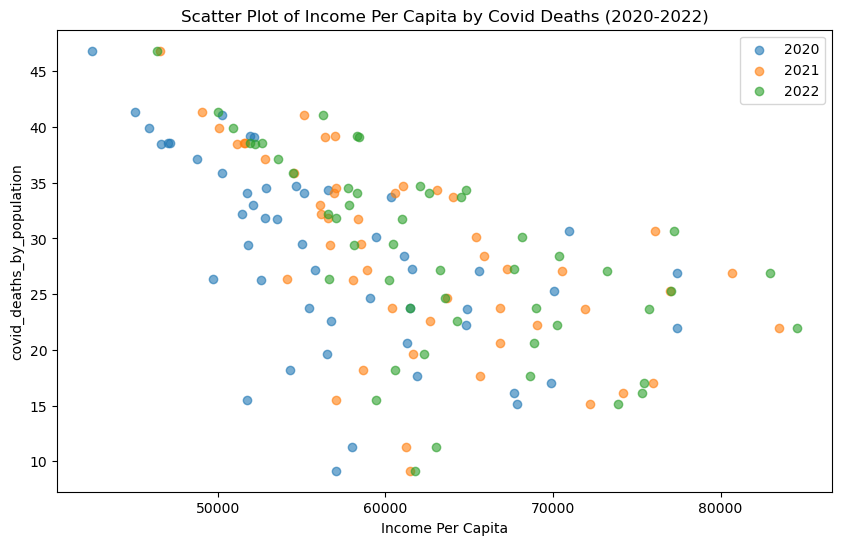

In [248]:
plt.figure(figsize=(10, 6))

# Scatter plot for 2020
plt.scatter(state_df['Inc_Per_Cap_2020'], state_df.covid_deaths_by_population, label='2020', alpha=0.6)

# Scatter plot for 2021
plt.scatter(state_df['Inc_Per_Cap_2021'], state_df.covid_deaths_by_population, label='2021', alpha=0.6)

# Scatter plot for 2022
plt.scatter(state_df['Inc_Per_CAp_2022'], state_df.covid_deaths_by_population, label='2022', alpha=0.6)

plt.title('Scatter Plot of Income Per Capita by Covid Deaths (2020-2022)')
plt.xlabel('Income Per Capita')
plt.ylabel('covid_deaths_by_population')
plt.legend()

## County Level

In [263]:
county_df = pd.read_csv('../Data/Cleaned/county_df3.csv')
county_df

,FIPS_x,Years of Potential Life Lost Rate (premature death),% Fair/Poor Health,percent_smokers,percent_obese,Food Environment Index,% Physically Inactive,percent Excessive Drinking,PCP Rate,Preventable Hosp stays Rate,...,percent Non-Hispanic White,percent Not Proficient in English,percent Female,number Rural,Masks,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,water,cases,deaths
0,1001,8824.0,18,19,38,7.2,31,17,42.0,6599.0,...,74.5,1,51.3,22921.0,267.0,42.2,73.8,0,18961.0,230.0
1,1003,7225.0,18,17,31,8.0,24,17,73.0,3833.0,...,83.0,0,51.5,77060.0,267.0,53.2,89.9,1,67496.0,719.0
2,1005,9586.0,26,22,44,5.6,28,13,39.0,4736.0,...,46.0,1,47.2,18613.0,267.0,44.5,75.3,0,7027.0,103.0
3,1007,11784.0,20,20,38,7.6,35,16,57.0,5998.0,...,74.3,0,46.5,15663.0,267.0,36.6,64.2,0,7692.0,108.0
4,1009,10908.0,21,20,34,8.5,29,15,23.0,4162.0,...,86.9,2,50.7,51562.0,267.0,31.9,56.6,0,17731.0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,56021,7533.0,15,19,31,7.8,23,17,74.0,4094.0,...,78.6,1,49.4,18150.0,66.0,51.9,88.3,1,31069.0,318.0
1824,56025,7906.0,15,17,32,7.1,25,20,78.0,3975.0,...,86.9,1,49.6,10902.0,66.0,42.7,79.5,0,25510.0,298.0
1825,56029,6161.0,12,14,24,8.2,23,19,109.0,3244.0,...,90.5,1,50.1,12478.0,66.0,43.8,75.8,0,7603.0,151.0
1826,56033,8365.0,12,16,27,7.5,23,19,73.0,3047.0,...,91.2,0,49.7,10330.0,66.0,48.2,86.8,0,9711.0,86.0


In [265]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   FIPS_x                                               1828 non-null   int64  
 1   Years of Potential Life Lost Rate (premature death)  1828 non-null   float64
 2   % Fair/Poor Health                                   1828 non-null   int64  
 3   percent_smokers                                      1828 non-null   int64  
 4   percent_obese                                        1828 non-null   int64  
 5   Food Environment Index                               1828 non-null   float64
 6   % Physically Inactive                                1828 non-null   int64  
 7   percent Excessive Drinking                           1828 non-null   int64  
 8   PCP Rate                                             1828 non-null  

In [266]:
county_df['covid_deaths_by_population'] = (county_df['deaths'] / county_df['Population']) * 10000

In [267]:
county_df.head()

,FIPS_x,Years of Potential Life Lost Rate (premature death),% Fair/Poor Health,percent_smokers,percent_obese,Food Environment Index,% Physically Inactive,percent Excessive Drinking,PCP Rate,Preventable Hosp stays Rate,...,percent Not Proficient in English,percent Female,number Rural,Masks,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,water,cases,deaths,covid_deaths_by_population
0,1001,8824.0,18,19,38,7.2,31,17,42.0,6599.0,...,1,51.3,22921.0,267.0,42.2,73.8,0,18961.0,230.0,41.438455
1,1003,7225.0,18,17,31,8.0,24,17,73.0,3833.0,...,0,51.5,77060.0,267.0,53.2,89.9,1,67496.0,719.0,33.814926
2,1005,9586.0,26,22,44,5.6,28,13,39.0,4736.0,...,1,47.2,18613.0,267.0,44.5,75.3,0,7027.0,103.0,40.759794
3,1007,11784.0,20,20,38,7.6,35,16,57.0,5998.0,...,0,46.5,15663.0,267.0,36.6,64.2,0,7692.0,108.0,47.644256
4,1009,10908.0,21,20,34,8.5,29,15,23.0,4162.0,...,2,50.7,51562.0,267.0,31.9,56.6,0,17731.0,260.0,44.817541


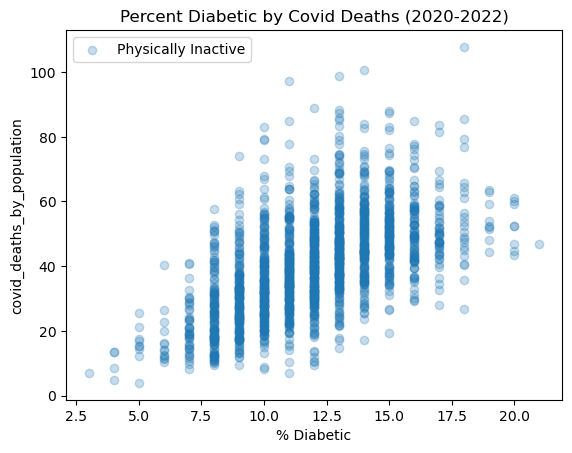

In [268]:
plt.scatter(county_df['Percent Diabetic'], county_df.covid_deaths_by_population, label='Physically Inactive', alpha=0.25)

plt.title('Percent Diabetic by Covid Deaths (2020-2022)')
plt.xlabel('% Diabetic')
plt.ylabel('covid_deaths_by_population')
plt.legend()

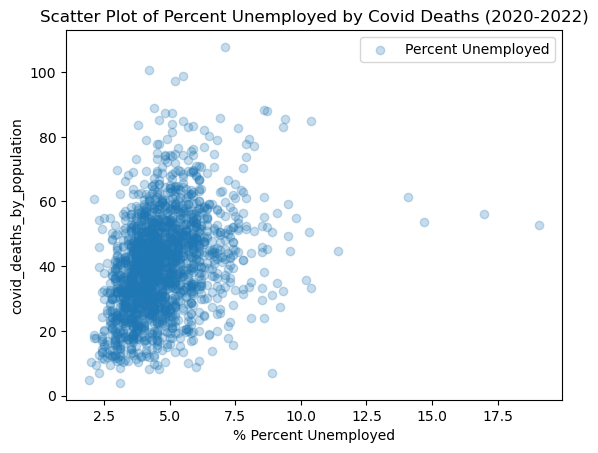

In [269]:
plt.scatter(county_df['Percent Unemployed'], county_df.covid_deaths_by_population, label='Percent Unemployed', alpha=0.25)

plt.title('Scatter Plot of Percent Unemployed by Covid Deaths (2020-2022)')
plt.xlabel('% Percent Unemployed')
plt.ylabel('covid_deaths_by_population')
plt.legend()

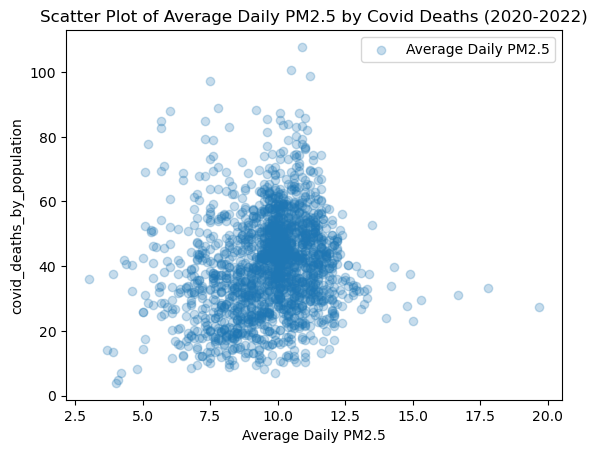

In [270]:
plt.scatter(county_df['Average Daily PM2.5'], county_df.covid_deaths_by_population, label='Average Daily PM2.5', alpha=0.25)

plt.title('Scatter Plot of Average Daily PM2.5 by Covid Deaths (2020-2022)')
plt.xlabel('Average Daily PM2.5')
plt.ylabel('covid_deaths_by_population')
plt.legend()

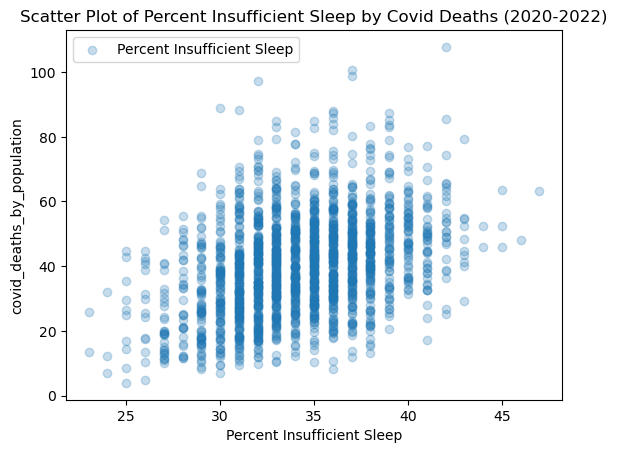

In [271]:
plt.scatter(county_df['Percent Insufficient Sleep'], county_df.covid_deaths_by_population, label='Percent Insufficient Sleep', alpha=0.25)

plt.title('Scatter Plot of Percent Insufficient Sleep by Covid Deaths (2020-2022)')
plt.xlabel('Percent Insufficient Sleep')
plt.ylabel('covid_deaths_by_population')
plt.legend()

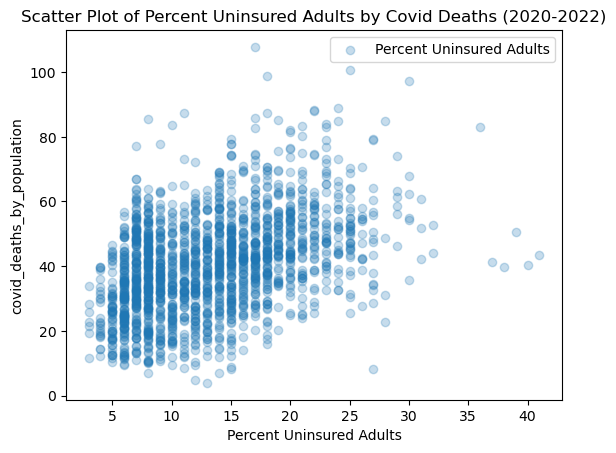

In [272]:
plt.scatter(county_df['Percent Uninsured Adults'], county_df.covid_deaths_by_population, label='Percent Uninsured Adults', alpha=0.25)
plt.title('Scatter Plot of Percent Uninsured Adults by Covid Deaths (2020-2022)')
plt.xlabel('Percent Uninsured Adults')
plt.ylabel('covid_deaths_by_population')
plt.legend()

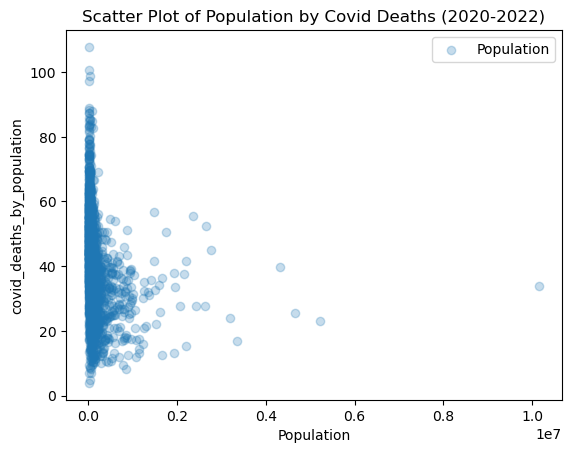

In [273]:
plt.scatter(county_df['Population'], county_df.covid_deaths_by_population, label='Population', alpha=0.25)

plt.title('Scatter Plot of Population by Covid Deaths (2020-2022)')
plt.xlabel('Population')
plt.ylabel('covid_deaths_by_population')
plt.legend()

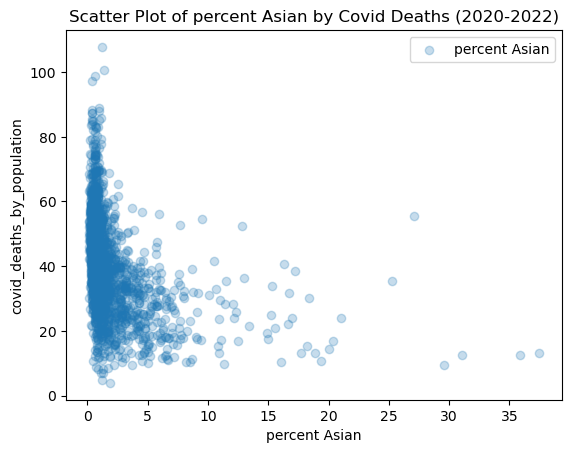

In [274]:
plt.scatter(county_df['percent Asian'], county_df.covid_deaths_by_population, label='percent Asian', alpha=0.25)

plt.title('Scatter Plot of percent Asian by Covid Deaths (2020-2022)')
plt.xlabel('percent Asian')
plt.ylabel('covid_deaths_by_population')
plt.legend()

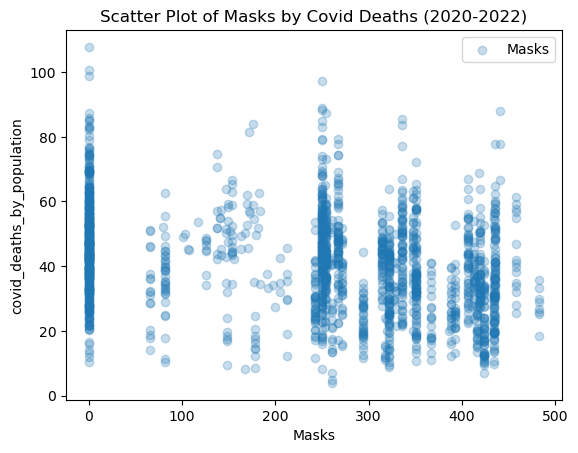

In [275]:
plt.scatter(county_df['Masks'], county_df.covid_deaths_by_population, label='Masks', alpha=0.25)

plt.title('Scatter Plot of Masks by Covid Deaths (2020-2022)')
plt.xlabel('Masks')
plt.ylabel('covid_deaths_by_population')
plt.legend()

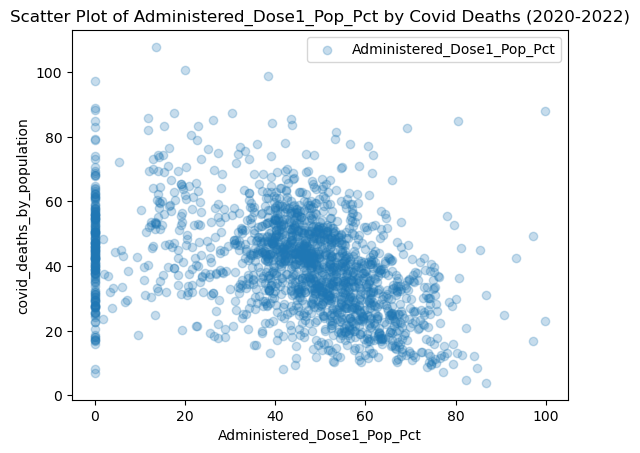

In [276]:
plt.scatter(county_df['Administered_Dose1_Pop_Pct'], county_df.covid_deaths_by_population, label='Administered_Dose1_Pop_Pct', alpha=0.25)
plt.title('Scatter Plot of Administered_Dose1_Pop_Pct by Covid Deaths (2020-2022)')
plt.xlabel('Administered_Dose1_Pop_Pct')
plt.ylabel('covid_deaths_by_population')
plt.legend()

C:\Users\kaitl\AppData\Local\Temp\ipykernel_30224\192836209.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))
) missing from current font.\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)


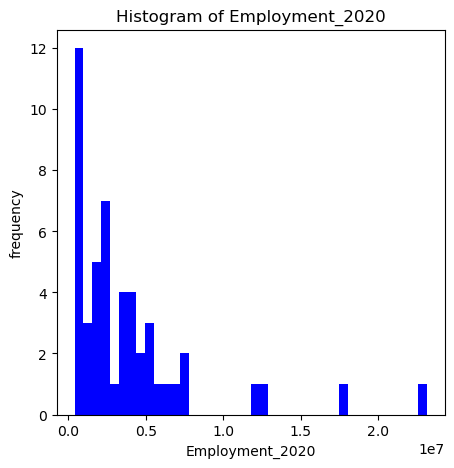

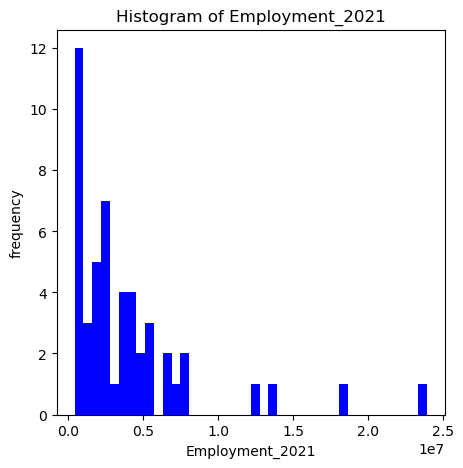

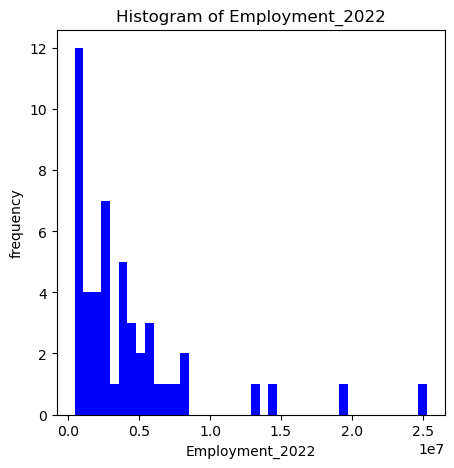

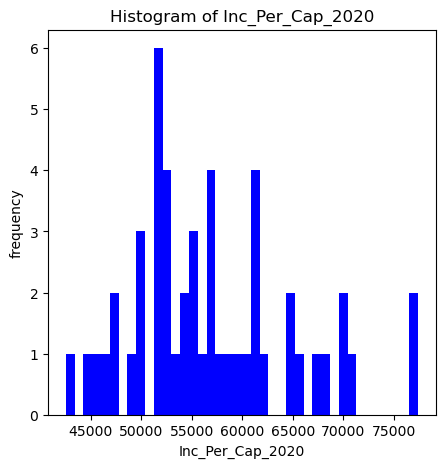

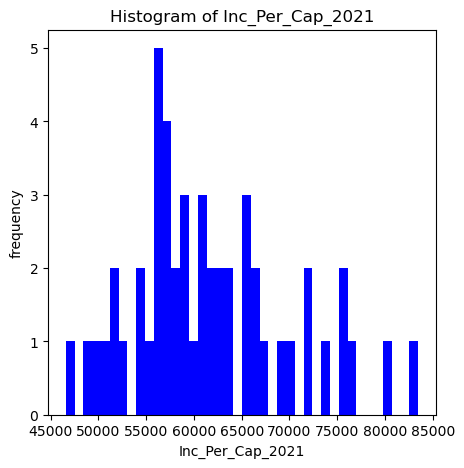

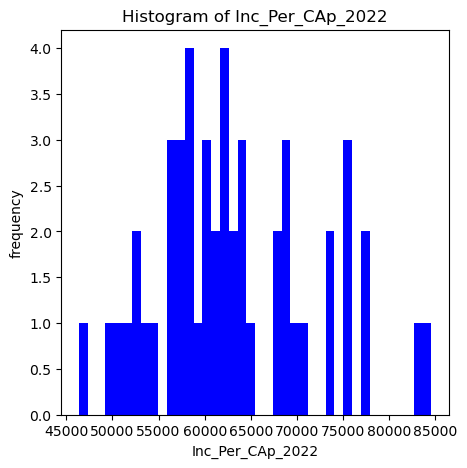

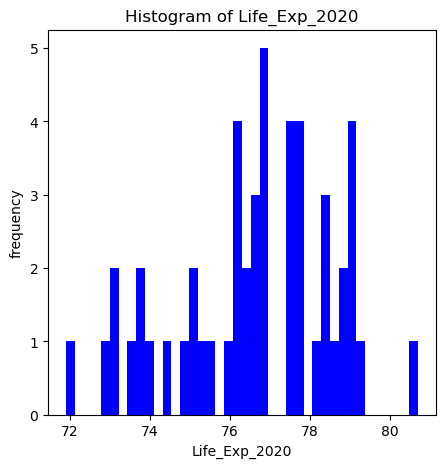

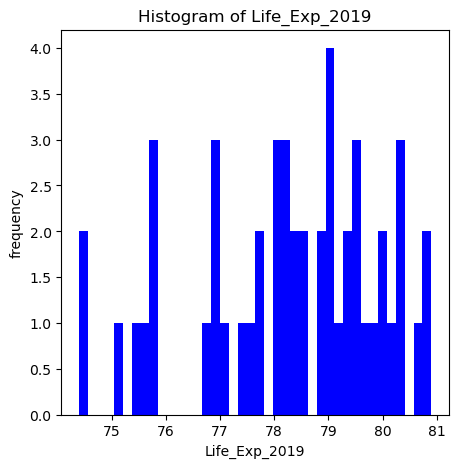

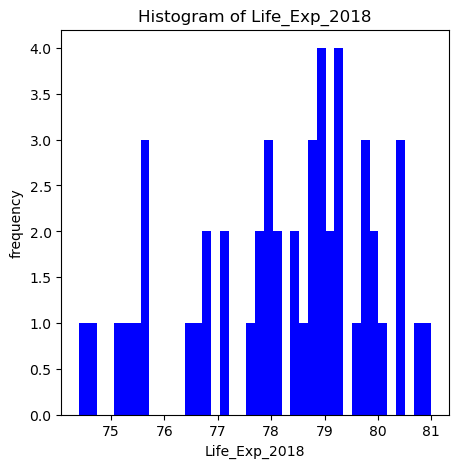

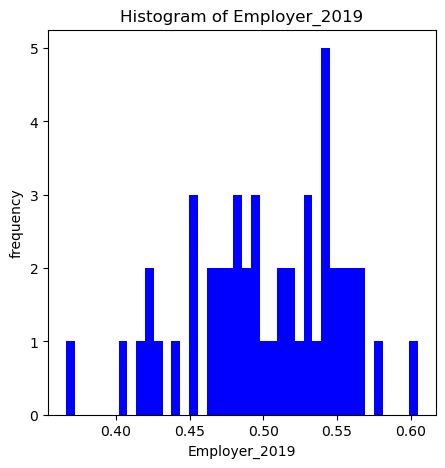

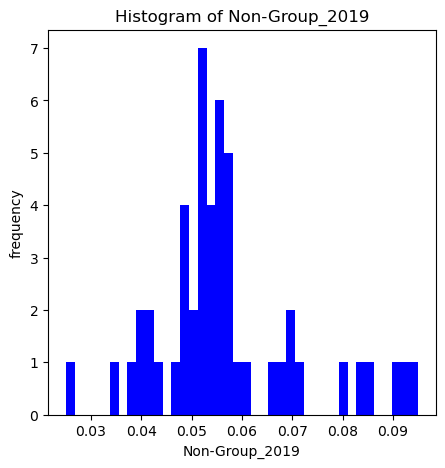

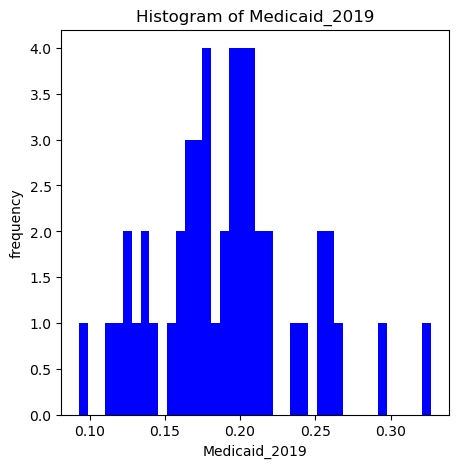

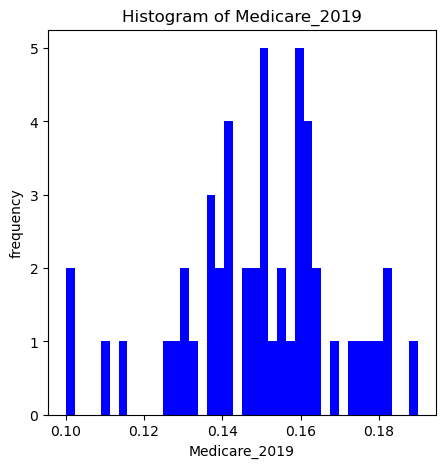

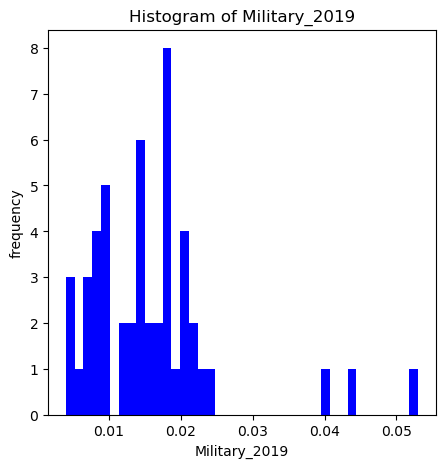

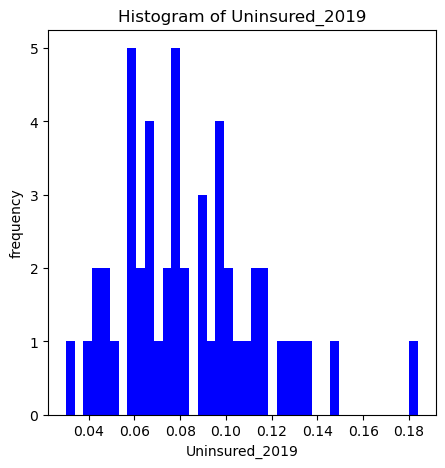

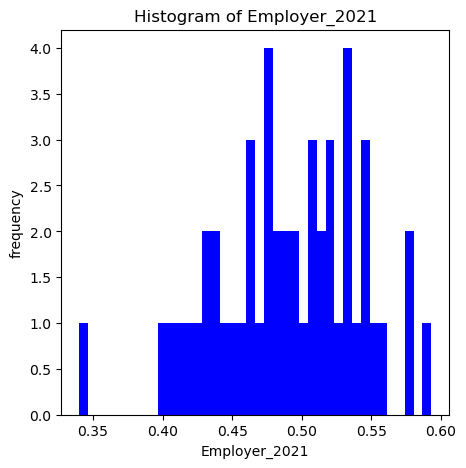

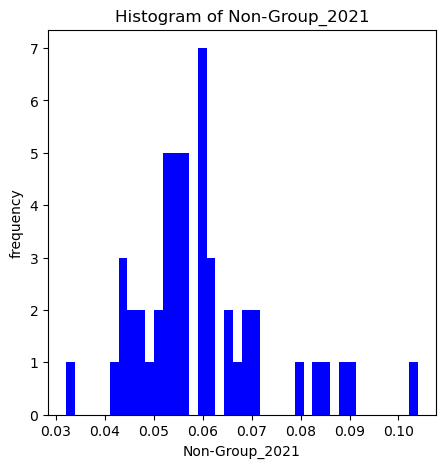

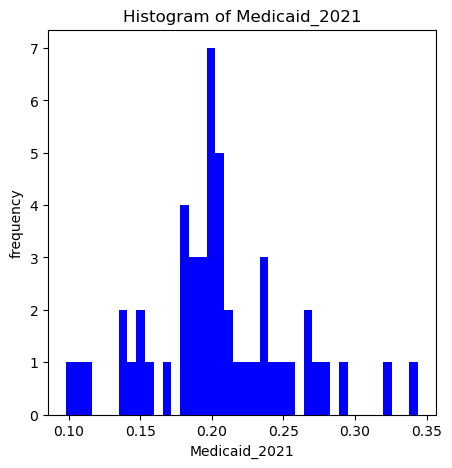

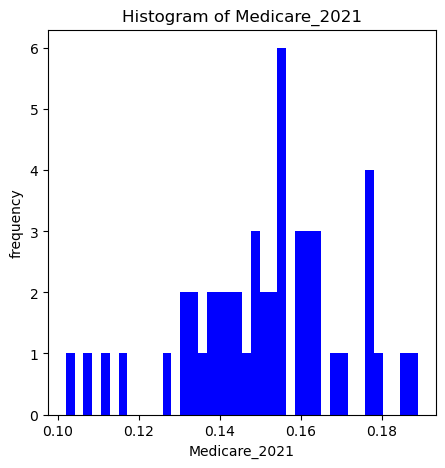

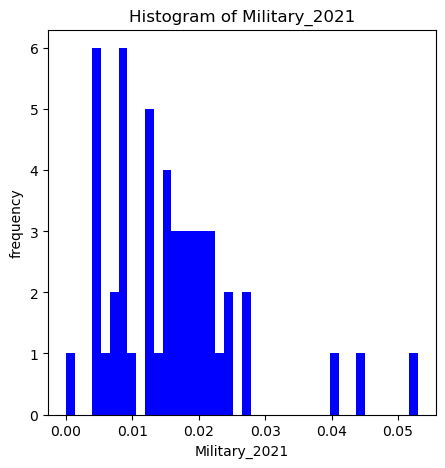

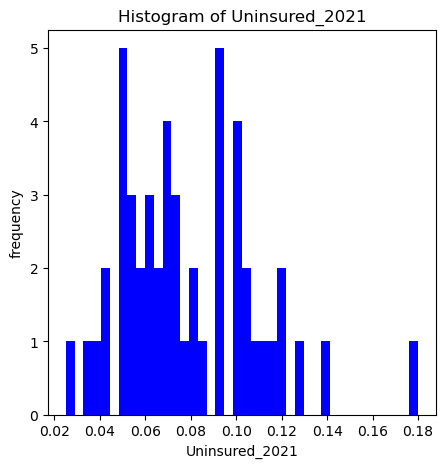

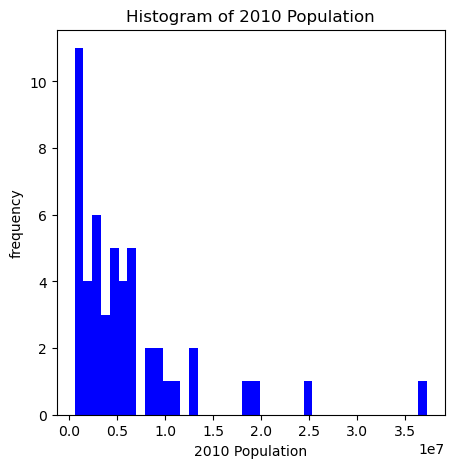

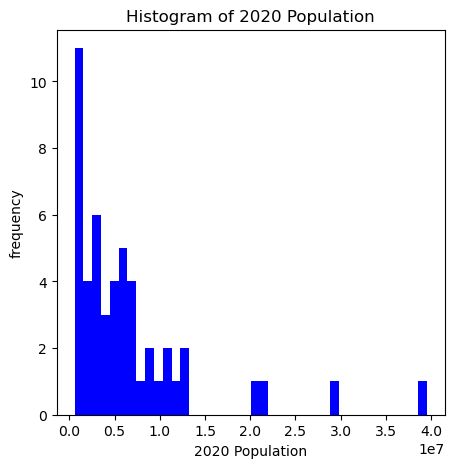

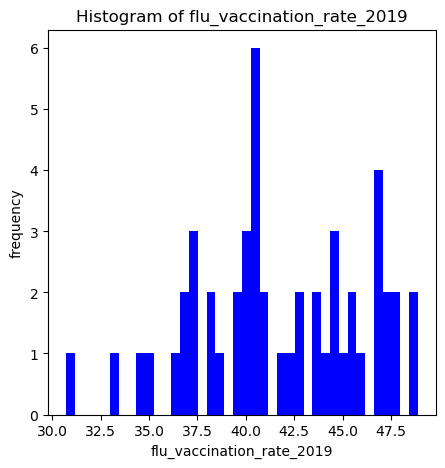

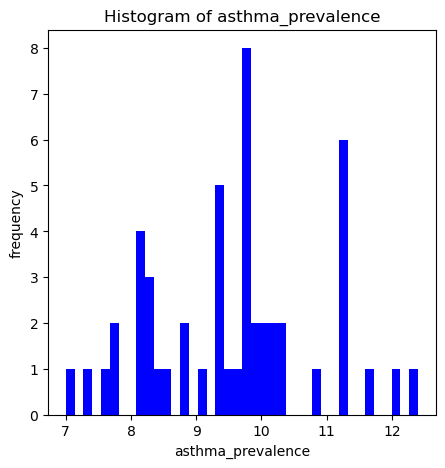

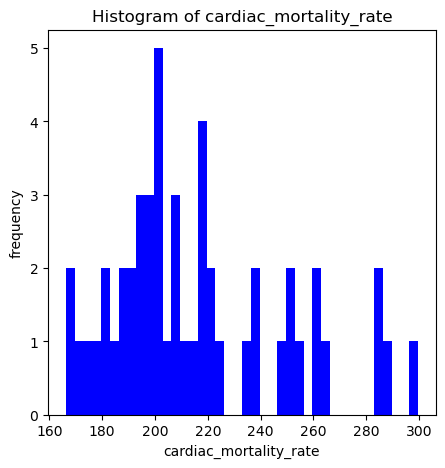

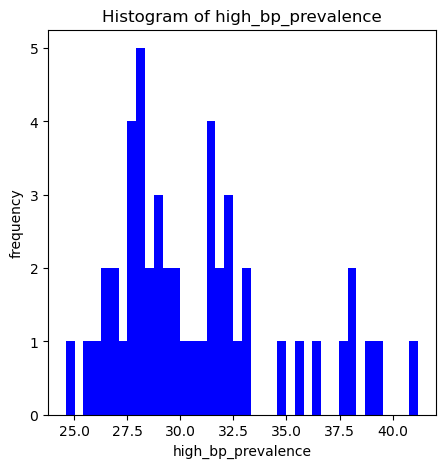

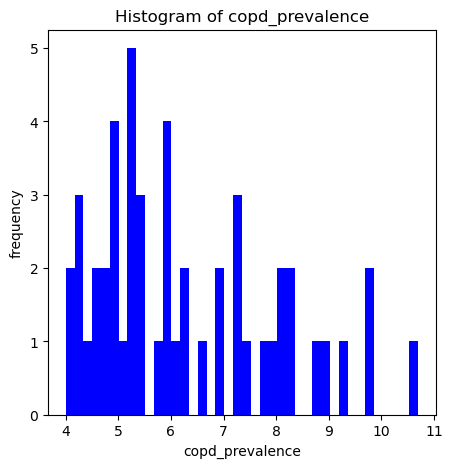

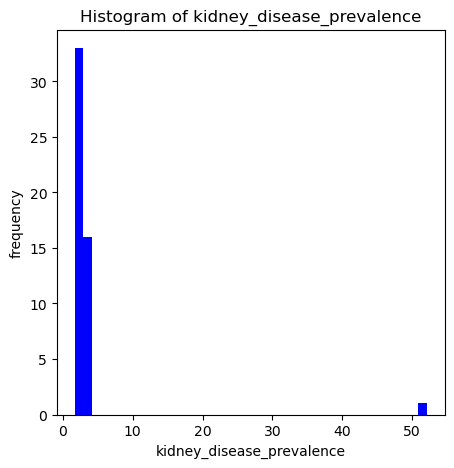

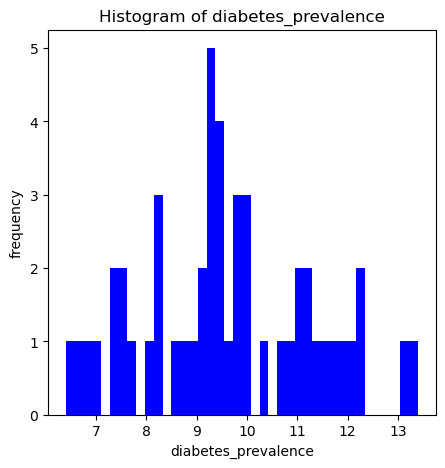

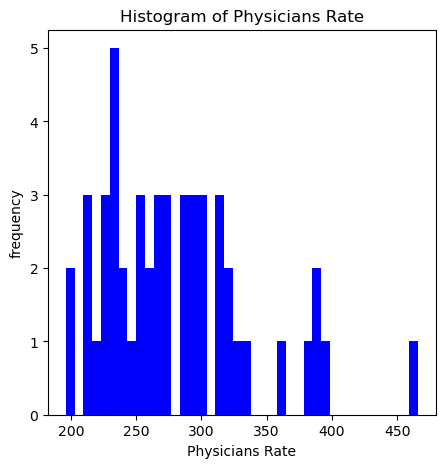

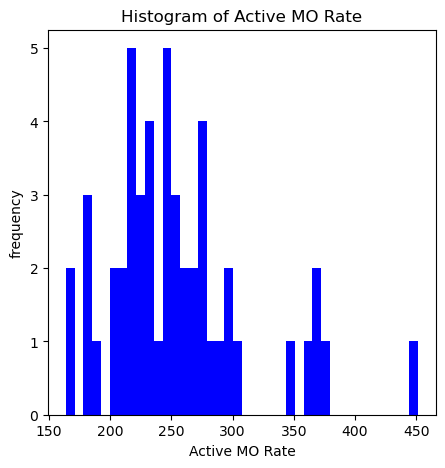

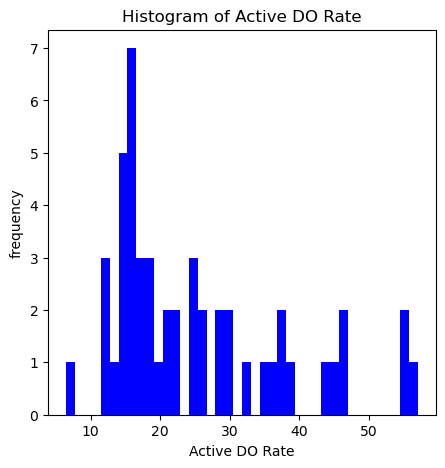

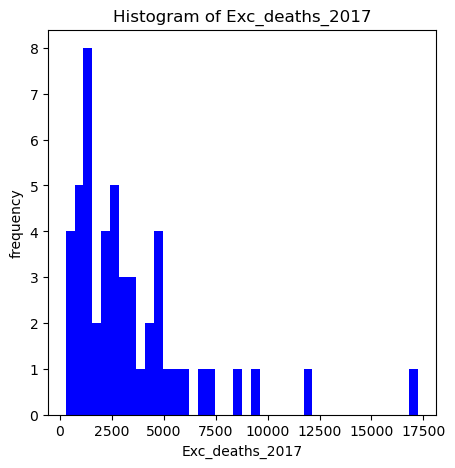

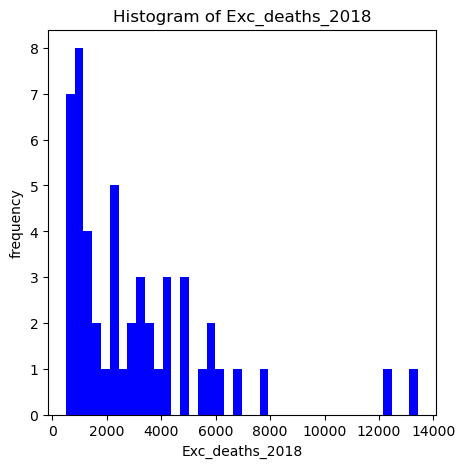

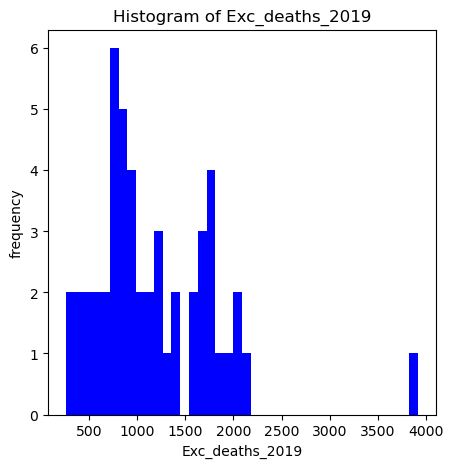

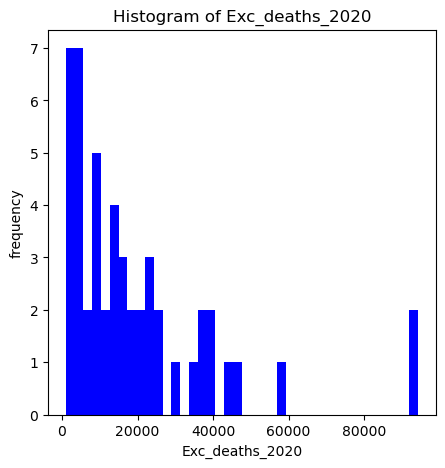

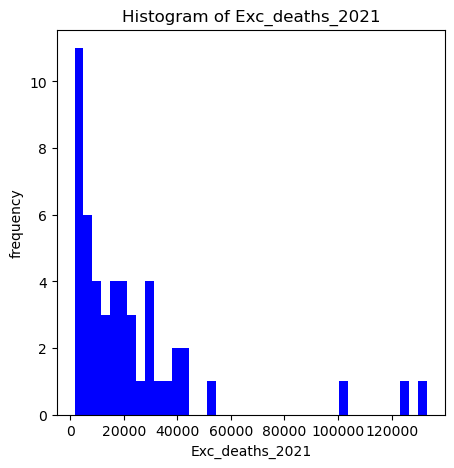

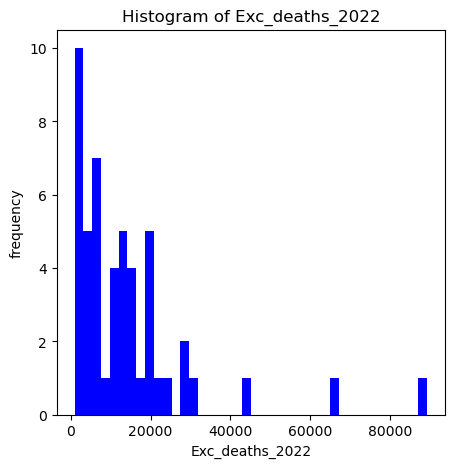

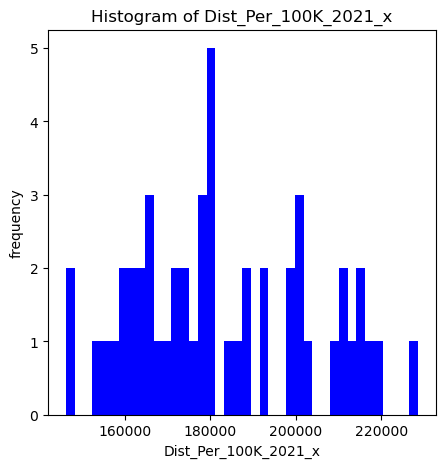

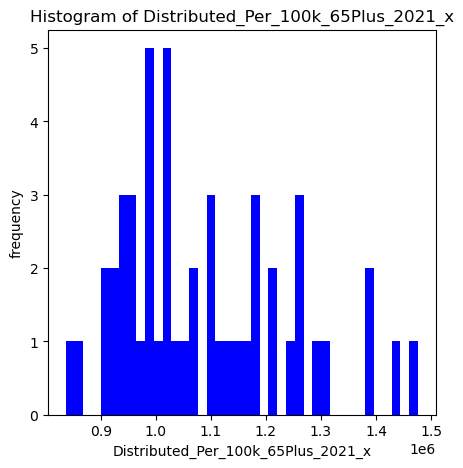

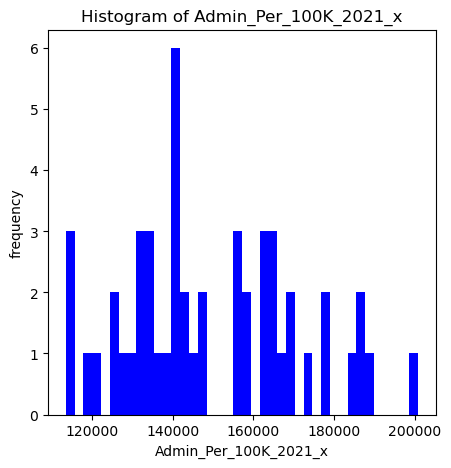

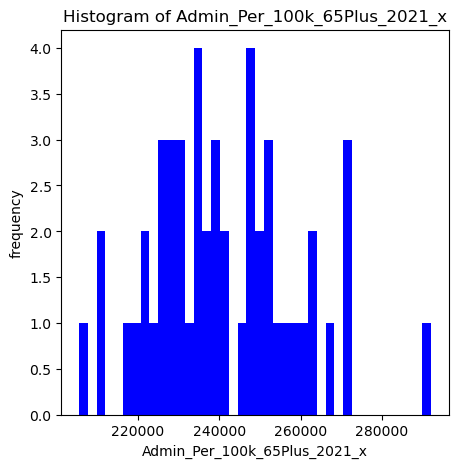

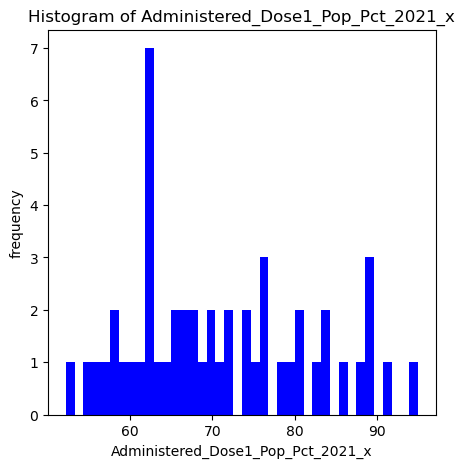

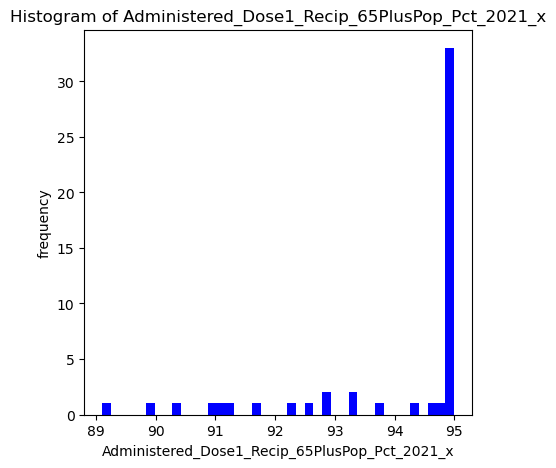

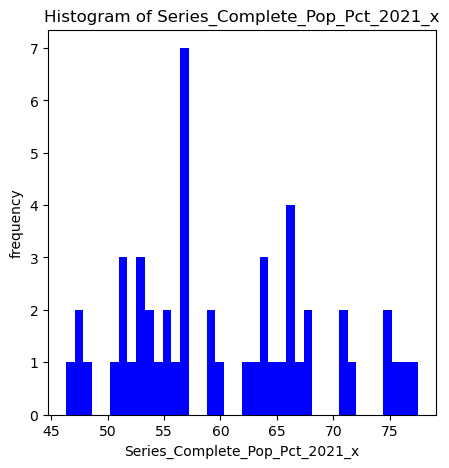

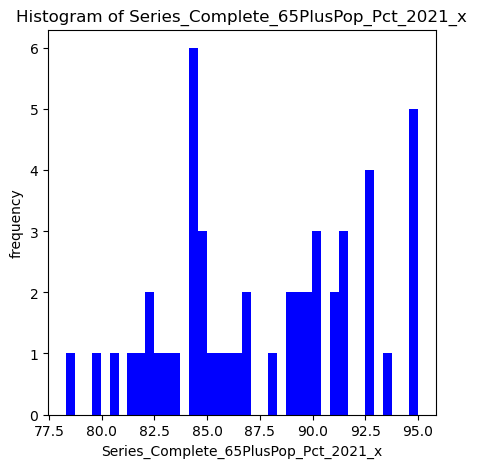

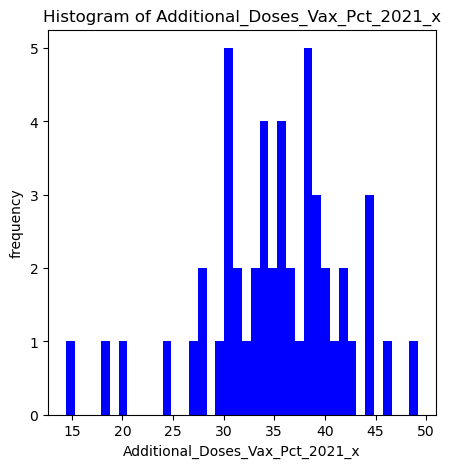

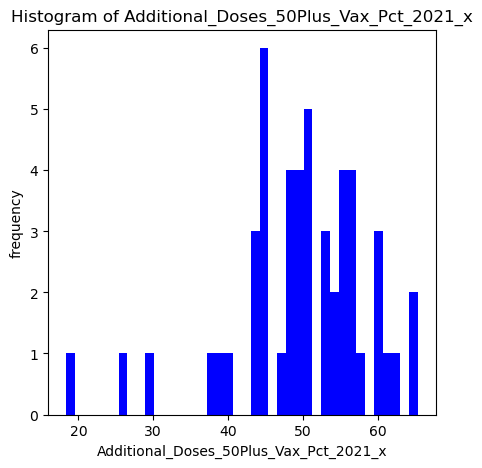

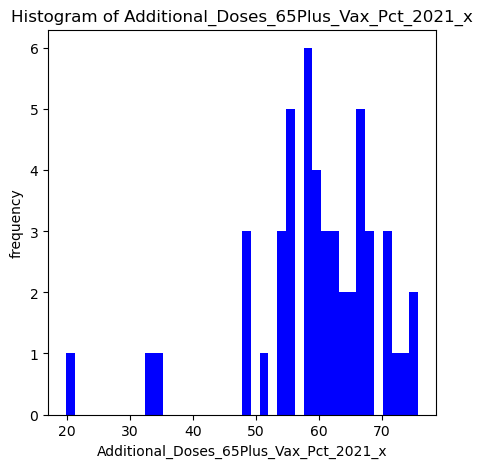

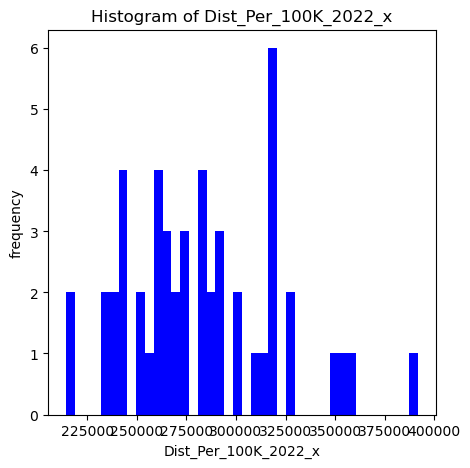

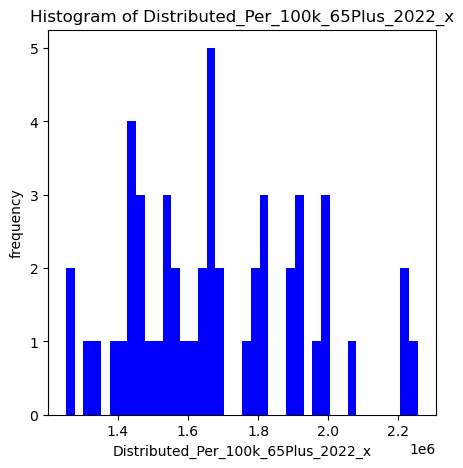

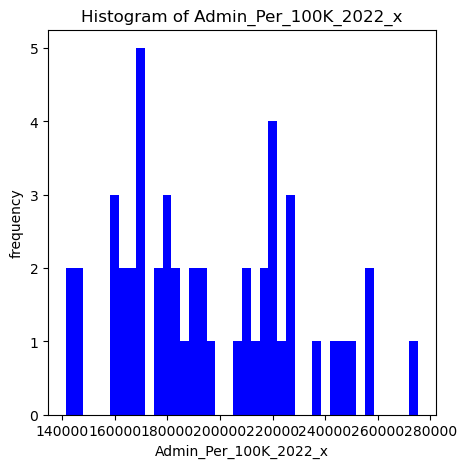

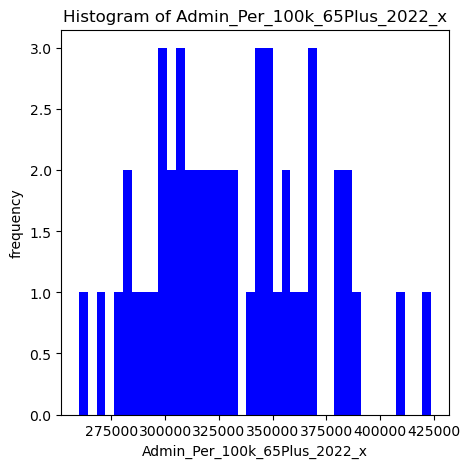

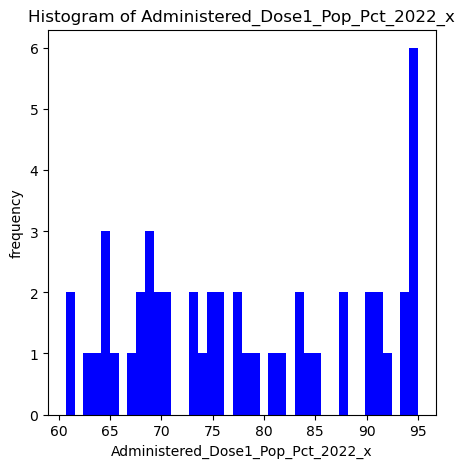

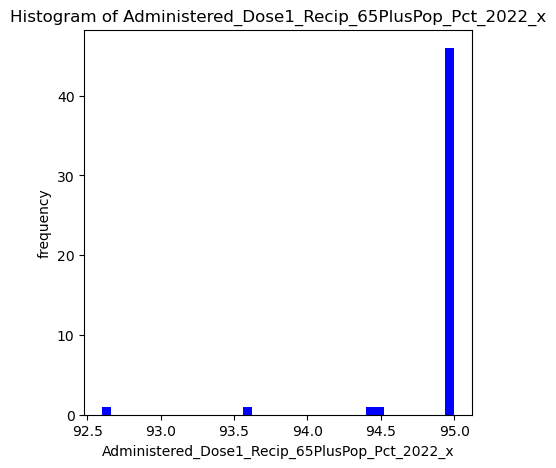

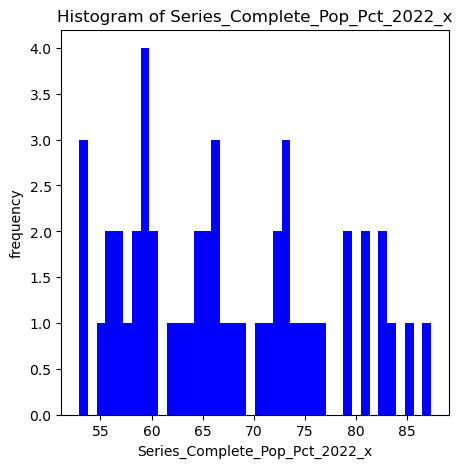

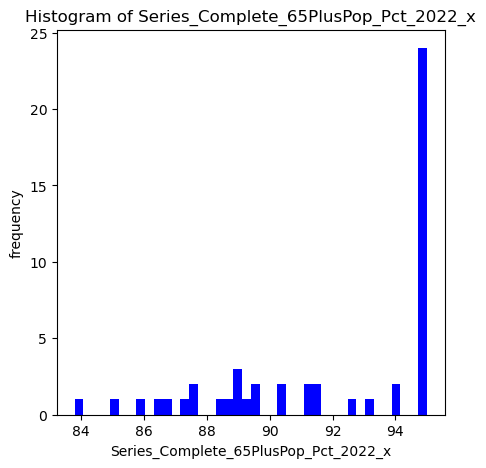

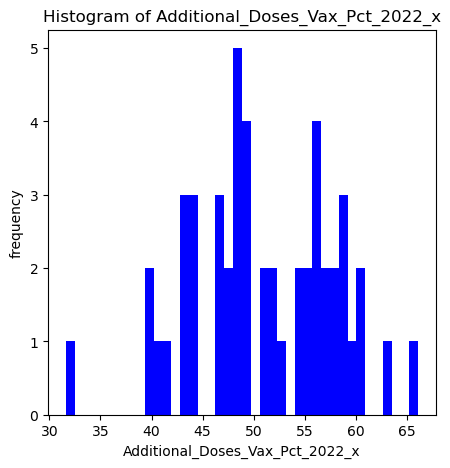

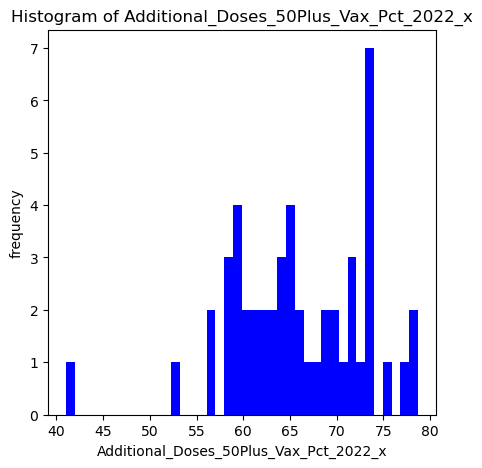

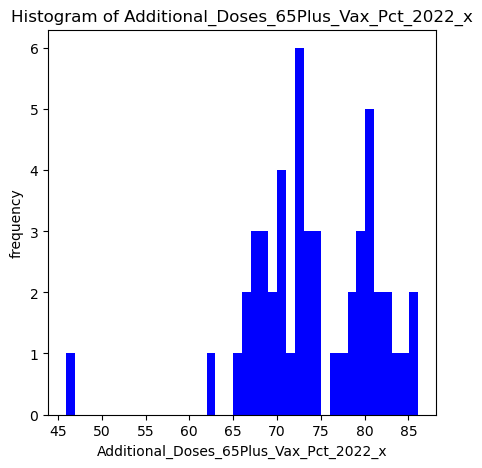

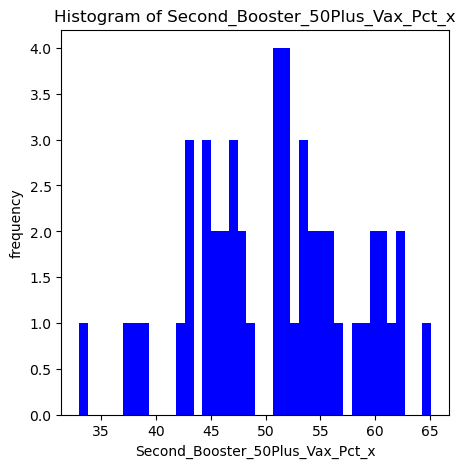

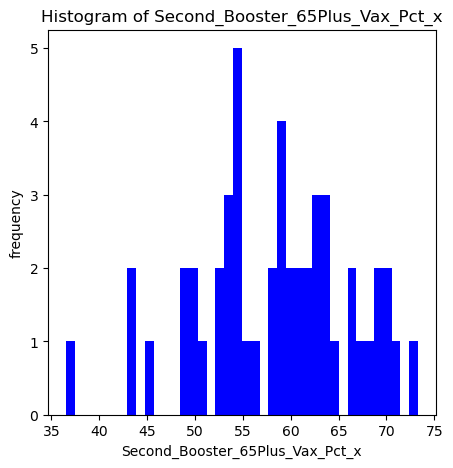

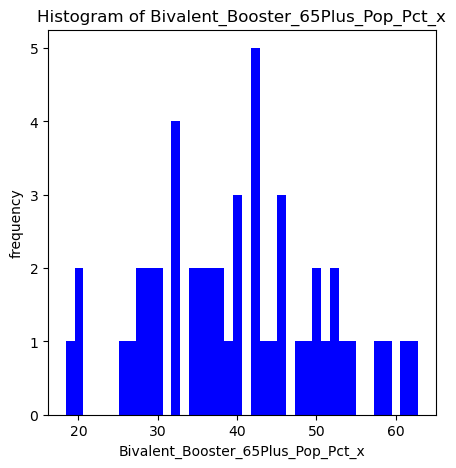

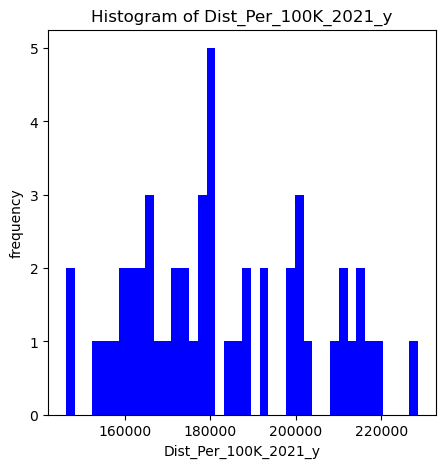

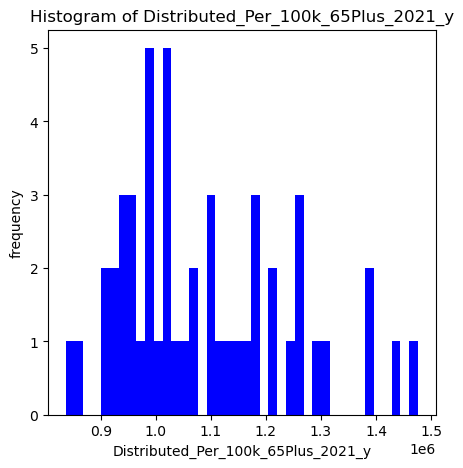

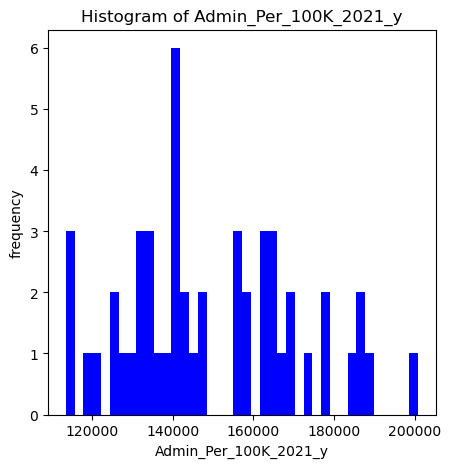

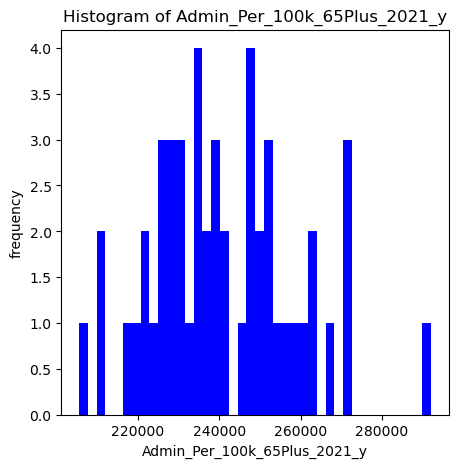

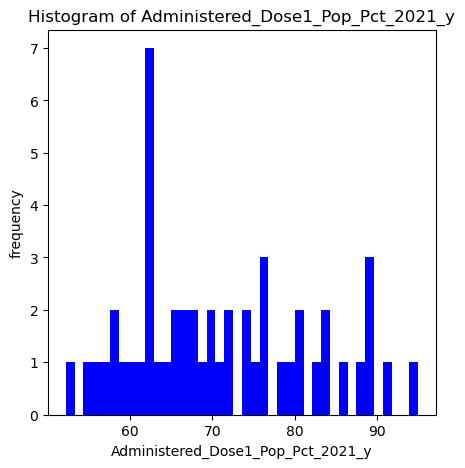

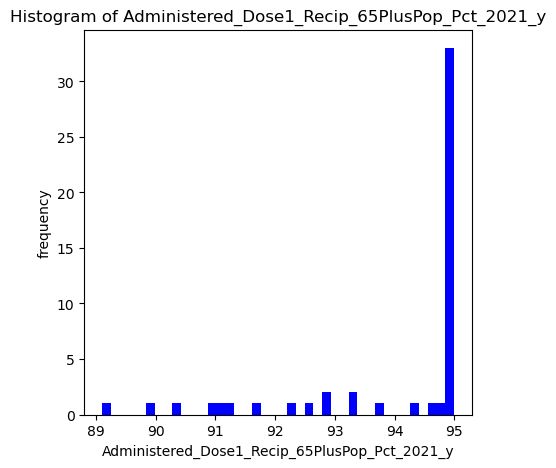

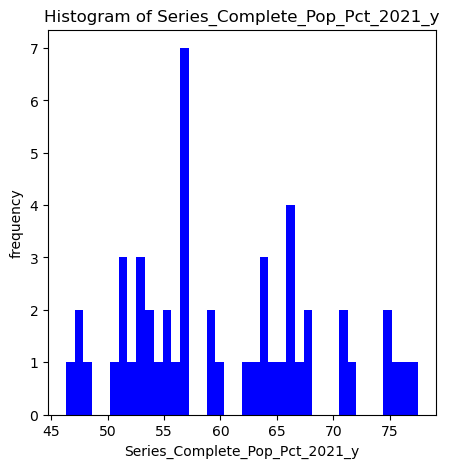

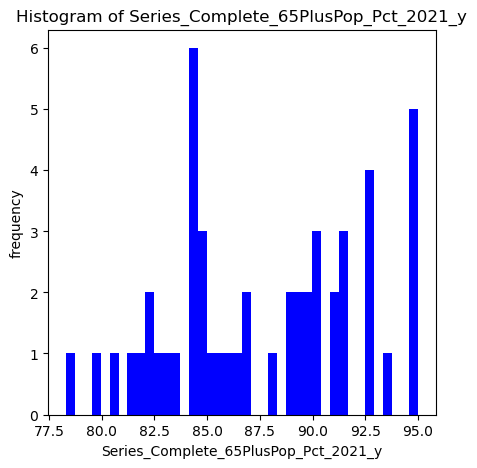

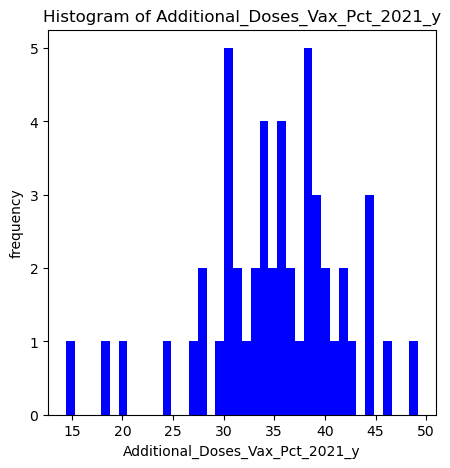

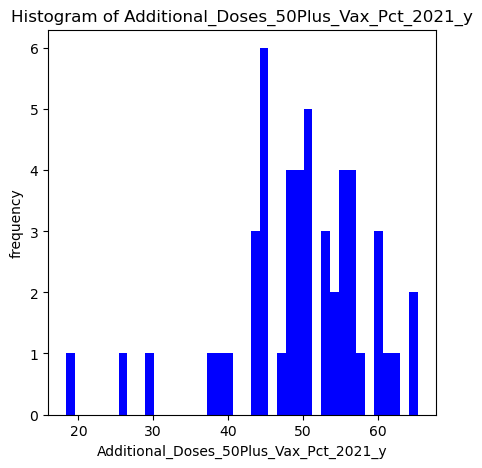

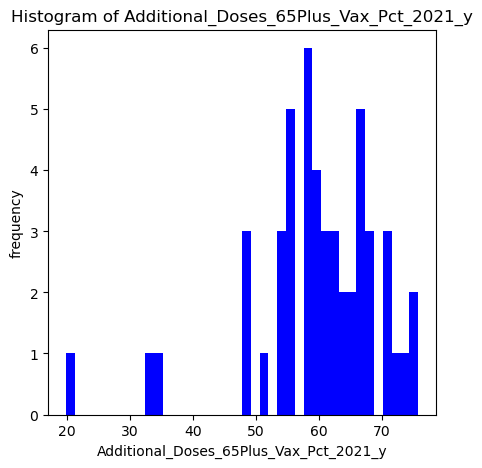

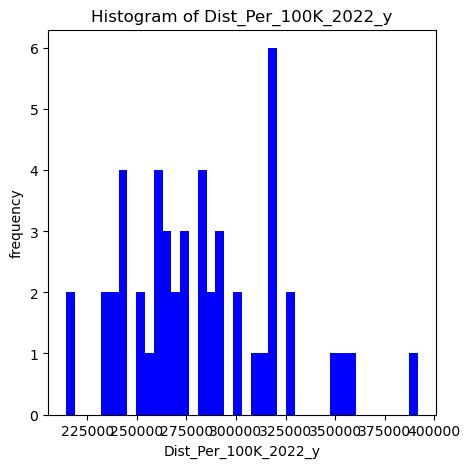

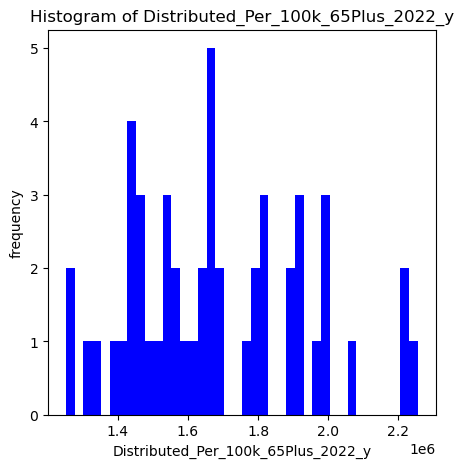

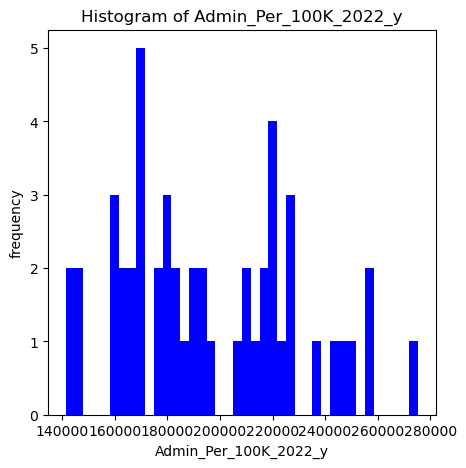

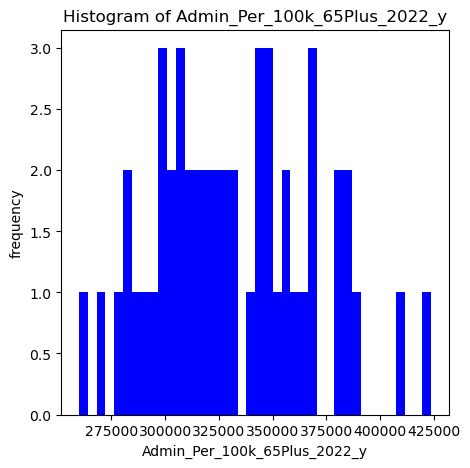

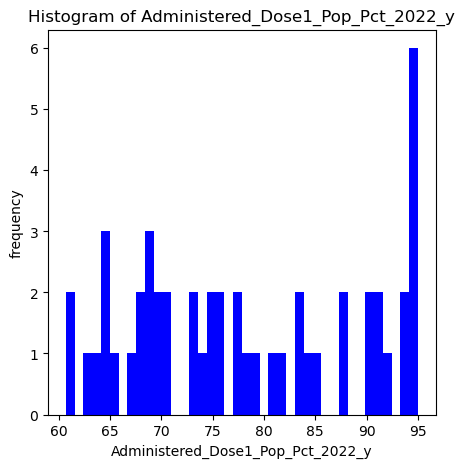

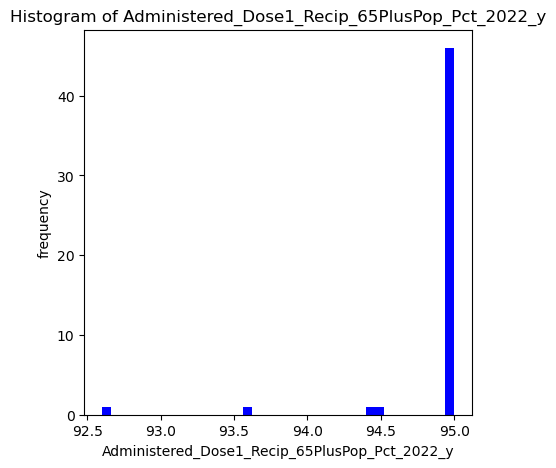

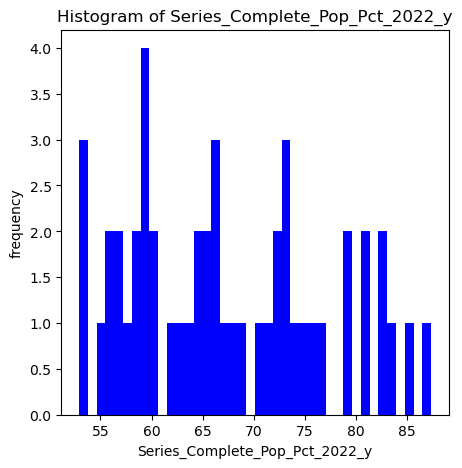

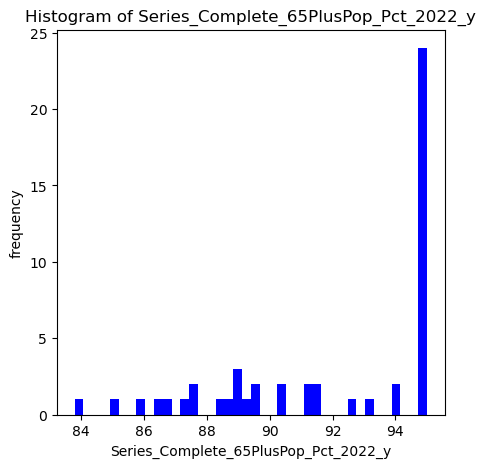

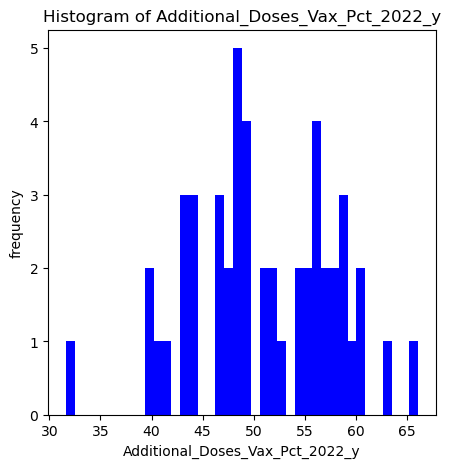

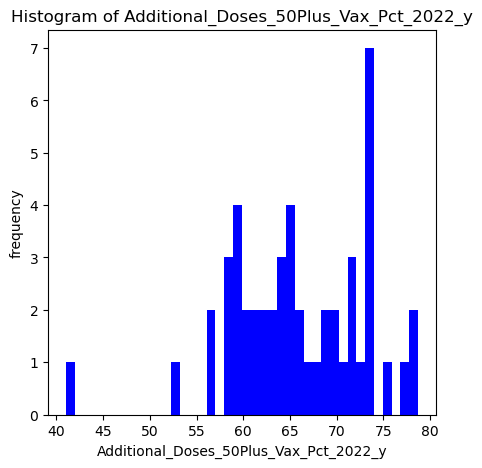

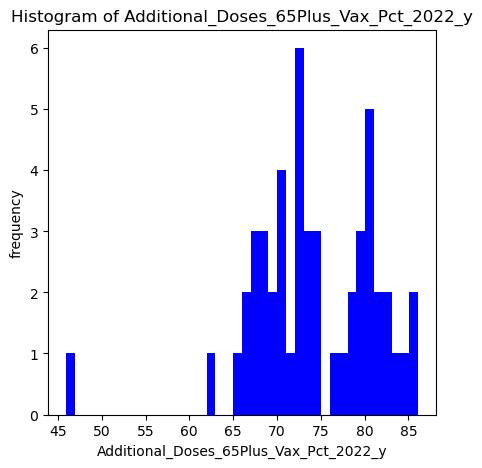

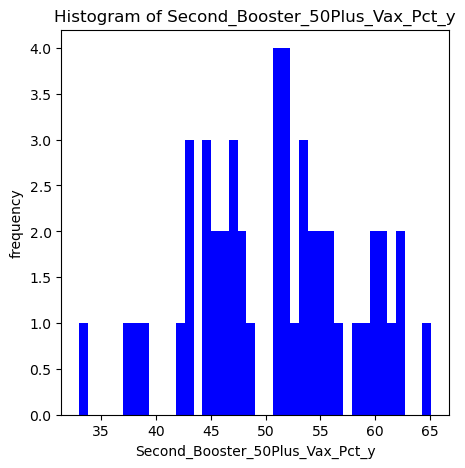

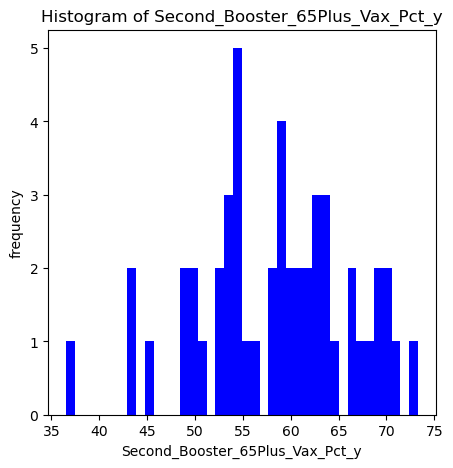

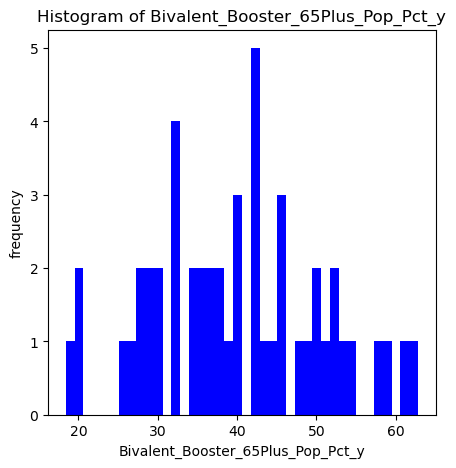

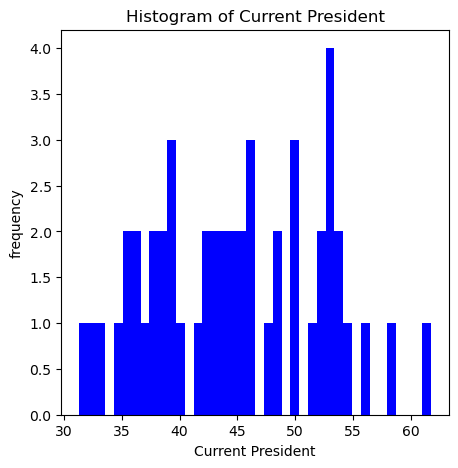

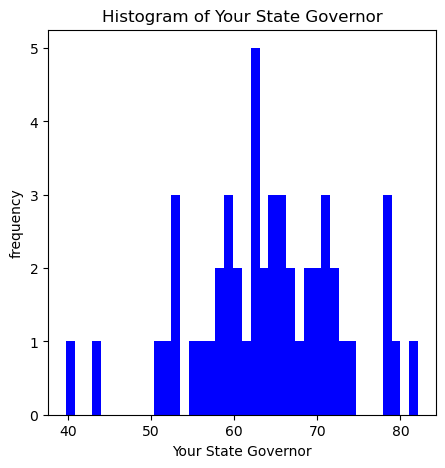

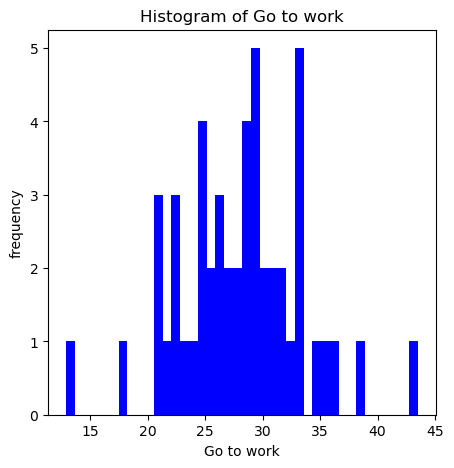

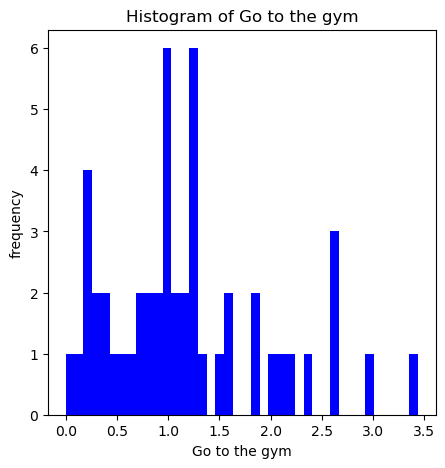

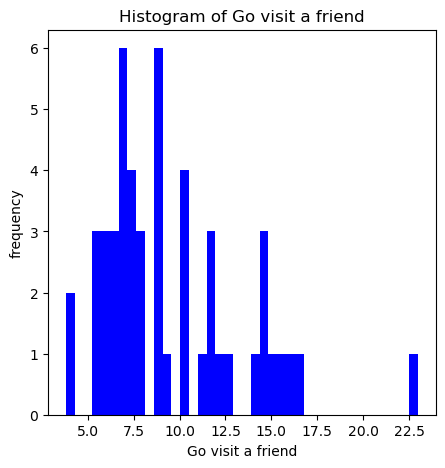

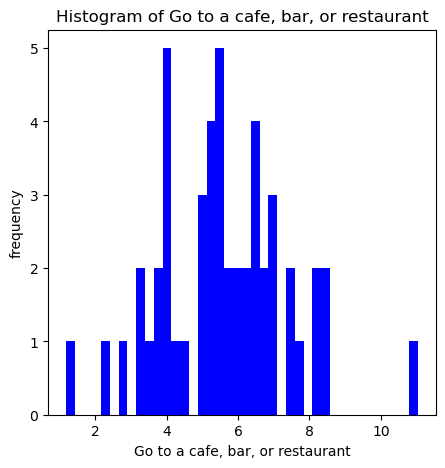

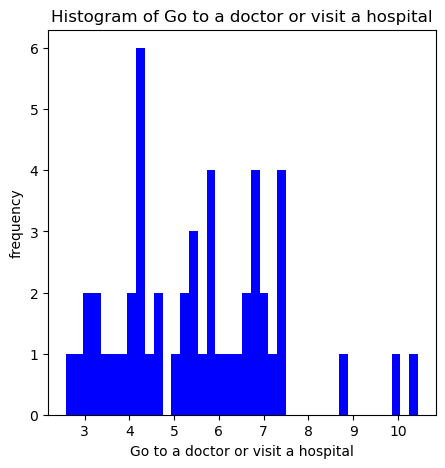

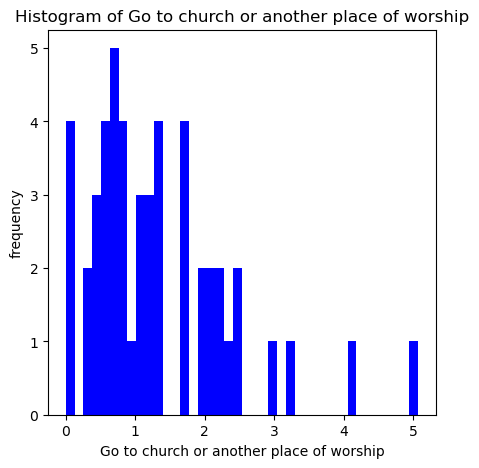

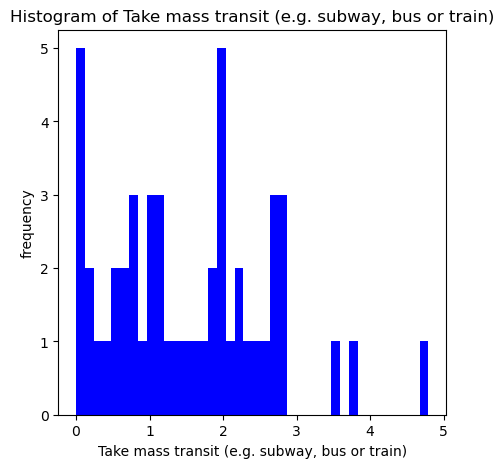

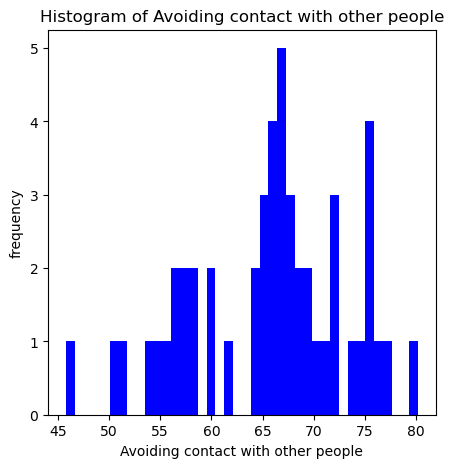

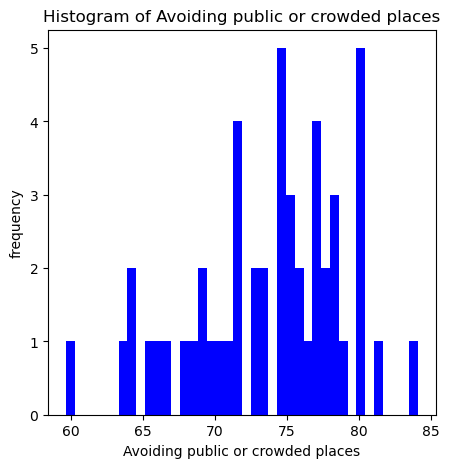

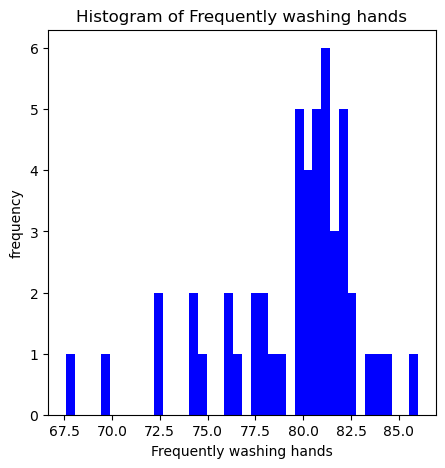

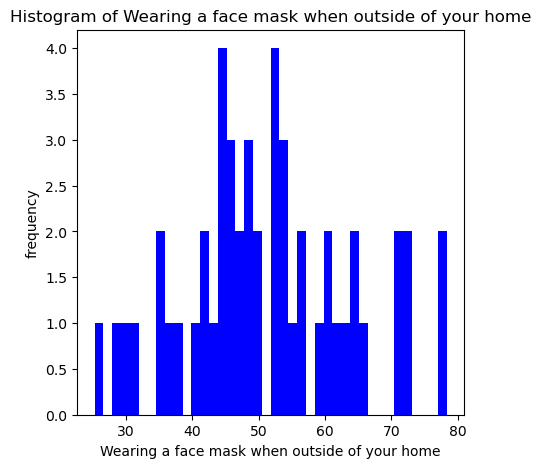

) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


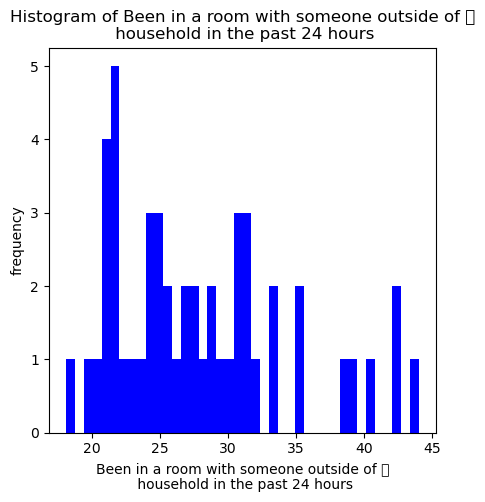

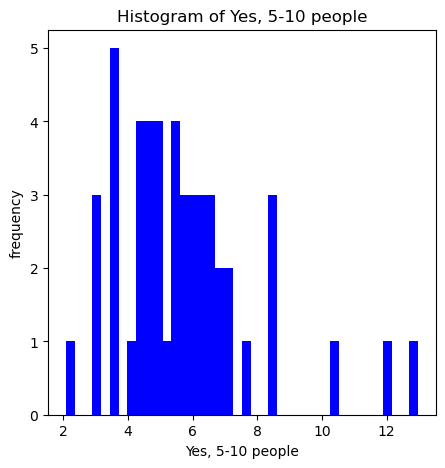

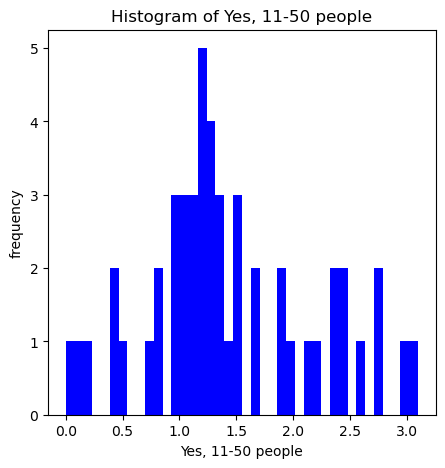

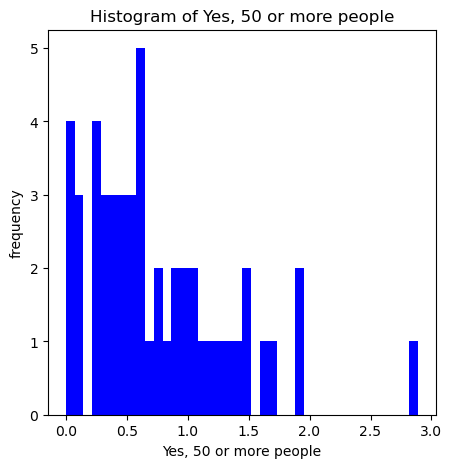

In [278]:
####create histogram for all numerical columns
covid_df = pd.read_csv('../Data/merged_state_with_health.csv')
covid_df.head()

num_columns = covid_df.select_dtypes(include=['int64','float64'])
                                              
for column in num_columns.columns:
    plt.figure(figsize=(5,5))
    plt.hist(num_columns[column], bins=40,color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')